# 1. Funciones en comun

In [1]:
import json
import pandas as pd 
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import scipy.stats as stats
import re
import os
import random
import wquantiles

In [2]:
# funcion para recibir todos decimales
def float_conversion(value):
    try:
        return float(value)
    except (ValueError):
        return None

# predeterminamos pandas guardar hasta 15 decimales
pd.set_option("display.float_format", "{:.15f}".format)

In [3]:
# funcion para convertir numeros en fechas 
def change_time(value):
    try:
        date = dt.datetime(2022, 9, 1, 7, 0)
        value = date + dt.timedelta(hours = value)
        return value
    except (ValueError, TypeError):
        return None

In [4]:
# paletas para vizualizaciones
sns.set_palette("Set2")
colors = ["#66c2a5", "#fc8d62", "#8da0cb", "#e78ac3", "#a6d854", "#ffd92f", "#e5c494", "#b3b3b3"]

# 2. Creacion de dataframes

## 2.1 df_info_lotes

In [5]:
# abrimos json 
json_info_lotes = json.load(open(r".\data\info_lote.json"))

# creamos diccionario para escribit el jason
data_info_lotes = {"numero_lote" : [], "t_id" : [], "marca" : [], "coste_inicial" : []}

# escribimos los datos al diccionario
for key in json_info_lotes:
    for value in range(len(json_info_lotes[key])):
        data_info_lotes["numero_lote"].append(key)
        data_info_lotes["t_id"].append(json_info_lotes[key][value]["t_id"])
        data_info_lotes["marca"].append(json_info_lotes[key][value]["marca"])
        data_info_lotes["coste_inicial"].append(float_conversion(str(json_info_lotes[key][value]["coste_inicial"])))

In [6]:
df_info_lotes = pd.DataFrame(data_info_lotes)
df_info_lotes.head()

numero_lote           t_id              marca     coste_inicial
0     G80V76K49J80T71    Apple 1.png      ParaísoFrutal 2.642048011224653
1    G80V76K49L46V78M   Apple 10.png      TropicalSabor 1.702296297714921
2  G80V76K49L48J80T71  Apple 100.png  DeliciaNaturaleza 1.176703363717762
3  G80V76K49L49J80T71  Apple 101.png      EmbrujoFrutal 2.314692618074393
4  G80V76K49L50J80T71  Apple 102.png      ExóticoManjar 2.473541003000006

## 2.2 df_lotes

In [7]:
json_lotes = json.load(open(r".\data\lotes.json"))

data_lotes = {"t_id" : [], "numero_lote" : []}

for key, value in json_lotes.items():
    data_lotes["t_id"].append(key)
    data_lotes["numero_lote"].append(value)

In [8]:
df_lotes = pd.DataFrame(data_lotes)
df_lotes.head()

t_id         numero_lote
0    Apple 1.png     G80V76K49J80T71
1   Apple 10.png    G80V76K49L46V78M
2  Apple 100.png  G80V76K49L48J80T71
3  Apple 101.png  G80V76K49L49J80T71
4  Apple 102.png  G80V76K49L50J80T71

## 2.3 df_proveedores

In [9]:
json_proveedores = json.load(open(r".\data\proveedores.json"))

data_proveedores = {"t_id" : [], "proveedor" : []}

for key in json_proveedores:
    for value in range(len(json_proveedores[key])):
        data_proveedores["t_id"].append(json_proveedores[key][value]["t_id"])
        data_proveedores["proveedor"].append(json_proveedores[key][value]["proveedor"])

In [10]:
df_proveedores = pd.DataFrame(data_proveedores)
df_proveedores.head()

t_id                             proveedor
0    Apple 1.png  Agricultura Inteligente TechCultivos
1  Apple 109.png  Agricultura Inteligente TechCultivos
2  Apple 205.png  Agricultura Inteligente TechCultivos
3  Apple 240.png  Agricultura Inteligente TechCultivos
4   Apple 25.png  Agricultura Inteligente TechCultivos

## 2.4 df_p_c

In [11]:
json_p_c = json.load(open(r".\data\proveedores-clientes.json"))

data_p_c = {"proveedor" : [], "t_id" : [], "cliente" : []}

for key in json_p_c:
    for value in range(len(json_p_c[key])):
            data_p_c["proveedor"].append(key)
            data_p_c["t_id"].append(json_p_c[key][value][0])
            data_p_c["cliente"].append(json_p_c[key][value][1])

In [12]:
df_p_c = pd.DataFrame(data_p_c)
df_p_c.head()

proveedor           t_id  \
0  Agricultura Inteligente TechCultivos    Apple 1.png   
1  Agricultura Inteligente TechCultivos  Apple 109.png   
2  Agricultura Inteligente TechCultivos  Apple 205.png   
3  Agricultura Inteligente TechCultivos  Apple 240.png   
4  Agricultura Inteligente TechCultivos   Apple 25.png   

                      cliente  
0               CompraMaestra  
1            Almacén Estrella  
2       EcoMercado Sostenible  
3              Cosecha Fresca  
4  Central de Abastos Central

## 2.5 df_tipos

In [13]:
json_tipos = json.load(open(r".\data\tipo.json"))

data_tipos = {"t_id" : [], "tipo" : [], "tiempo_recogida" : []}

for key in json_tipos:
    for value in range(len(json_tipos[key])):
        data_tipos["t_id"].append(json_tipos[key][value]["t_id"])
        data_tipos["tipo"].append(json_tipos[key][value]["tipo"])
        data_tipos["tiempo_recogida"].append(change_time(json_tipos[key][value]["tiempo_recogida"]))

In [14]:
df_tipos = pd.DataFrame(data_tipos)
df_tipos.head()

t_id   tipo     tiempo_recogida
0    Apple 1.png  Apple 2022-09-19 08:00:00
1   Apple 10.png  Apple 2022-09-11 19:00:00
2  Apple 100.png  Apple 2022-09-19 17:00:00
3  Apple 101.png  Apple 2022-09-28 06:00:00
4  Apple 102.png  Apple 2022-09-18 17:00:00

## 2.6 df_ventas

In [15]:
json_ventas = json.load(open(r".\data\venta_en_cliente.json"))

data_ventas = {"cliente" : [], "t_id" : [], "tiempo_venta" : [], "precio_venta" : [], "peso" : []}

for key in json_ventas:
    for value in range(len(json_ventas[key])):
        data_ventas["cliente"].append(key)
        data_ventas["t_id"].append(json_ventas[key][value]["t_id"])
        data_ventas["tiempo_venta"].append(change_time(json_ventas[key][value]["tiempo_venta"]))
        data_ventas["precio_venta"].append(float_conversion(str(json_ventas[key][value]["precio_venta"])))
        data_ventas["peso"].append(float_conversion(str(json_ventas[key][value]["peso"])))

In [16]:
df_ventas = pd.DataFrame(data_ventas)
df_ventas.head()

cliente           t_id        tiempo_venta      precio_venta  \
0  CompraMaestra    Apple 1.png 2022-09-19 12:00:00 4.909680048977395   
1  CompraMaestra   Apple 10.png 2022-09-12 02:00:00 3.425103156752120   
2  CompraMaestra  Apple 135.png 2022-09-17 11:00:00 3.468745758352403   
3  CompraMaestra  Apple 218.png 2022-09-21 11:00:00 4.345631664004423   
4  CompraMaestra  Apple 304.png 2022-09-27 21:00:00 3.709716179225746   

                 peso  
0 264.195356627132924  
1 141.647326889856288  
2 516.167669874450667  
3 267.665780341307141  
4 326.369599303833240

# 3. EDA

## 3.1 Error de t_id

Resulta que tenemos algunas imagenes con el mismo nombre pero están en diferentes carpetas. 
Por ejemplo, tenemos varias categorias de manzanas (A, B, C, etc.)
Vamos a definir categoria de cada imagen para guardar las imagenes que llevan el mismo nombre pero son de diferentes categorias.

In [17]:
# recorremos la carpetas de la imagenes y creamos la lista de los directorios donde estan las imagenes
lista_dir =[]
directorio =  r".\data\archive"
ultimo_dir = ""
for dire in os.listdir(directorio):
    pth = os.path.join(directorio , dire)
    ultimo_dir = dire
    if os.path.isdir(pth):
        for dir_2 in os.listdir(pth):
            if os.path.isdir(os.path.join(pth, dir_2)):
                ultimo_dir = dir_2
                for dir_3 in os.listdir(os.path.join(pth, dir_2)):
                    lista_dir.append([ultimo_dir,dir_3])
            else:
                lista_dir.append([ultimo_dir,dir_2])
                

df_dir = pd.DataFrame(lista_dir, columns = ["categoria", "t_id"])

## 3.2 DF

In [18]:
# creamos dataframe con todos los datos
df = pd.merge(df_tipos, df_dir,  on = "t_id", how = "inner")
df = pd.merge(df, df_info_lotes, on = "t_id", how = "inner")
df = pd.merge(df, df_proveedores, on = "t_id", how = "inner")
df = pd.merge(df, df_ventas, on = "t_id", how = "inner")
df.drop_duplicates(subset = ["t_id", "categoria"], inplace = True)

In [19]:
df.head()

t_id   tipo     tiempo_recogida categoria         numero_lote  \
0    Apple 1.png  Apple 2022-09-19 08:00:00   Apple A     G80V76K49J80T71   
1   Apple 10.png  Apple 2022-09-11 19:00:00   Apple A    G80V76K49L46V78M   
2  Apple 100.png  Apple 2022-09-19 17:00:00   Apple A  G80V76K49L48J80T71   
3  Apple 101.png  Apple 2022-09-28 06:00:00   Apple A  G80V76K49L49J80T71   
4  Apple 102.png  Apple 2022-09-18 17:00:00   Apple A  G80V76K49L50J80T71   

               marca     coste_inicial                             proveedor  \
0      ParaísoFrutal 2.642048011224653  Agricultura Inteligente TechCultivos   
1      TropicalSabor 1.702296297714921           Semillero Genético BioCampo   
2  DeliciaNaturaleza 1.176703363717762            Pesca Sustentable Oceanica   
3      EmbrujoFrutal 2.314692618074393          Carnes Sostenibles CampoReal   
4      ExóticoManjar 2.473541003000006           Silos y Almacenes AgroVault   

                   cliente        tiempo_venta      precio_venta  \
0            CompraMaestra 2022-09-19 12:00:00 4.909680048977395   
1            CompraMaestra 2022-09-12 02:00:00 3.425103156752120   
2          La Tienda Justa 2022-09-19 22:00:00 3.178385965000885   
3  Supermercados del Valle 2022-09-28 17:00:00 4.126967950889814   
4          Tienda Familiar 2022-09-19 03:00:00 3.349877591517806   

                 peso  
0 264.195356627132924  
1 141.647326889856288  
2 151.923586358242346  
3 442.475390924842372  
4 423.776864366668008

## 3.3 Error de "guava A"

Detectamos un error en la columna **tipo** en datos. Debido a que existen algunas imagenes con el mismo nombre, hay varios casos cuando a las imagenes de guava se le había asignado como tipo "Apple". Después de añadir la columna **categoria** detectamos que en realidad esas imagenes se encuentran en la carpeta "guava A". Así que vamos a cambiar el tipo a guava en estos casos.

In [20]:
# observamos cuando el tipo es apple y categoria (carpeta) es guava A
df[(df["categoria"] == "guava A") & (df["tipo"] == "Apple")].head()

t_id   tipo     tiempo_recogida categoria  \
1414   scene00201.png  Apple 2022-09-08 14:00:00   guava A   
2255   scene00401.png  Apple 2022-09-22 15:00:00   guava A   
3900   scene00601.png  Apple 2022-09-10 12:00:00   guava A   
7121   scene00701.png  Apple 2022-10-01 00:00:00   guava A   
10002  scene00801.png  Apple 2022-09-20 23:00:00   guava A   

                 numero_lote             marca     coste_inicial  \
1414   C67K78K48L50L49J80T71   VibranteSabores 1.474484534793308   
2255   C67K78K48L52L49J80T71       JugosoAroma 2.514025105560770   
3900   C67K78K48L54L49J80T71     TropicalSabor 2.191814052730417   
7121   C67K78K48L55L49J80T71  DulzuraSilvestre 1.353123479427428   
10002  C67K78K48L56L49J80T71     CosechaDivina 1.672115700811608   

                                  proveedor                cliente  \
1414   Agricultura Inteligente TechCultivos     Alimentación Total   
2255                  Veterinaria EcoAnimal         MaxiDescuentos   
3900                AgroSoftware Soluciones         Tienda Selecta   
7121            Semillero Genético BioCampo        La Tienda Justa   
10002           Cosechadoras Progresivas SA  EcoMercado Sostenible   

             tiempo_venta      precio_venta                peso  
1414  2022-09-28 13:00:00 3.123456326311724 335.875849309095031  
2255  2022-09-16 13:00:00 3.829634619089636 239.939460110800923  
3900  2022-09-26 12:00:00 2.764663083323036 274.443974078737369  
7121  2022-09-26 15:00:00 2.903998956830683 424.486871863206943  
10002 2022-09-17 19:00:00 3.343093383626982 367.655776034575467

In [21]:
# creamos condicion bajo cual cambiaremos la columna tipo
condicion = (df["categoria"] == "guava A") & (df["tipo"] == "Apple")

# cambiamos la columna bajo esta condicion
df.loc[condicion, "tipo"] = "Guava"

# comprobamos que ya no quedan incosistencias en data
df[(df["categoria"] == "guava A") & (df["tipo"] == "Apple")]

Empty DataFrame
Columns: [t_id, tipo, tiempo_recogida, categoria, numero_lote, marca, coste_inicial, proveedor, cliente, tiempo_venta, precio_venta, peso]
Index: []

## 3.4 Transformaciones Estéticas


In [22]:
# cambiamos que todos los tipos de fruta sean de mayuscula
df["tipo"] = df["tipo"].str.capitalize()

# anadimos espacios en las marcas
df["marca"] = df["marca"].apply(lambda x: re.sub(r"(?<=[A-Za-z])(?=[A-Z])", " ", x))

# anadimos espacios en los clientes
df["cliente"] = df["cliente"].apply(lambda x: re.sub(r"(?<=[A-Za-z])\B(?=[A-Z])", " ", x))

## 3.5 Observaciones

In [23]:
df.dtypes

t_id                       object
tipo                       object
tiempo_recogida    datetime64[ns]
categoria                  object
numero_lote                object
marca                      object
coste_inicial             float64
proveedor                  object
cliente                    object
tiempo_venta       datetime64[ns]
precio_venta              float64
peso                      float64
dtype: object

In [24]:
df.shape

(70549, 12)

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 70549 entries, 0 to 190908
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   t_id             70549 non-null  object        
 1   tipo             70549 non-null  object        
 2   tiempo_recogida  70549 non-null  datetime64[ns]
 3   categoria        70549 non-null  object        
 4   numero_lote      70549 non-null  object        
 5   marca            70549 non-null  object        
 6   coste_inicial    68538 non-null  float64       
 7   proveedor        70549 non-null  object        
 8   cliente          70549 non-null  object        
 9   tiempo_venta     70324 non-null  datetime64[ns]
 10  precio_venta     69855 non-null  float64       
 11  peso             70549 non-null  float64       
dtypes: datetime64[ns](2), float64(3), object(7)
memory usage: 7.0+ MB


In [26]:
df.describe()

tiempo_recogida         coste_inicial  \
count                          70549 68538.000000000000000   
mean   2022-09-16 07:39:02.048788736     1.999953977653217   
min              2022-09-01 09:00:00     0.022063830248989   
25%              2022-09-08 21:00:00     1.661521369696888   
50%              2022-09-16 07:00:00     1.999227189111593   
75%              2022-09-23 19:00:00     2.337722322288227   
max              2022-10-01 06:00:00     3.988367424724601   
std                              NaN     0.498675260390845   

                        tiempo_venta          precio_venta  \
count                          70324 69855.000000000000000   
mean   2022-09-16 11:44:39.984073728     3.498312746658928   
min              2022-08-31 15:00:00     0.317016583531684   
25%              2022-09-09 00:00:00     3.022991410857014   
50%              2022-09-16 11:00:00     3.498251377634533   
75%              2022-09-24 00:00:00     3.972134337222875   
max              2022-10-01 20:00:00     6.852004523007198   
std                              NaN     0.706788947818688   

                       peso  
count 70549.000000000000000  
mean    300.142990225871927  
min    -101.598110274638486  
25%     232.552940602546244  
50%     300.193323237669347  
75%     367.763627347498925  
max     706.148708462658988  
std      99.936072735482838

In [27]:
# comprobamos la cantidad de valores unicos en cada columna
for columna in df.columns:
    num_valore_unicos = df[columna].nunique()
    print(f'Número de valores únicos en {columna}: {num_valore_unicos}')

Número de valores únicos en t_id: 69687
Número de valores únicos en tipo: 15
Número de valores únicos en tiempo_recogida: 718
Número de valores únicos en categoria: 27
Número de valores únicos en numero_lote: 69567
Número de valores únicos en marca: 35
Número de valores únicos en coste_inicial: 67702
Número de valores únicos en proveedor: 35
Número de valores únicos en cliente: 34
Número de valores únicos en tiempo_venta: 749
Número de valores únicos en precio_venta: 69004
Número de valores únicos en peso: 69687


### 3.5.1 Investigación t_id y peso

Vemos que t_id (nombre de las imagenes) y peso tienen la misma cantidad de valores únicos.  
Vamos a investigarlo.

In [28]:
id_peso = df[df.duplicated(["t_id", "peso"], keep = False)]

In [29]:
id_peso.head()

t_id   tipo     tiempo_recogida categoria  \
1222  scene00201.png  Apple 2022-09-08 14:00:00   Apple B   
1286  scene00201.png  Apple 2022-09-08 14:00:00   Apple D   
1350  scene00201.png  Apple 2022-09-08 14:00:00   Apple F   
1414  scene00201.png  Guava 2022-09-08 14:00:00   guava A   
2247  scene00401.png  Apple 2022-09-22 15:00:00   Apple B   

                numero_lote             marca     coste_inicial  \
1222  C67K78K48L50L49J80T71  Vibrante Sabores 1.474484534793308   
1286  C67K78K48L50L49J80T71  Vibrante Sabores 1.474484534793308   
1350  C67K78K48L50L49J80T71  Vibrante Sabores 1.474484534793308   
1414  C67K78K48L50L49J80T71  Vibrante Sabores 1.474484534793308   
2247  C67K78K48L52L49J80T71      Jugoso Aroma 2.514025105560770   

                                 proveedor             cliente  \
1222  Agricultura Inteligente TechCultivos  Alimentación Total   
1286  Agricultura Inteligente TechCultivos  Alimentación Total   
1350  Agricultura Inteligente TechCultivos  Alimentación Total   
1414  Agricultura Inteligente TechCultivos  Alimentación Total   
2247                 Veterinaria EcoAnimal     Maxi Descuentos   

            tiempo_venta      precio_venta                peso  
1222 2022-09-28 13:00:00 3.123456326311724 335.875849309095031  
1286 2022-09-28 13:00:00 3.123456326311724 335.875849309095031  
1350 2022-09-28 13:00:00 3.123456326311724 335.875849309095031  
1414 2022-09-28 13:00:00 3.123456326311724 335.875849309095031  
2247 2022-09-16 13:00:00 3.829634619089636 239.939460110800923

In [30]:
id_peso.shape

(1459, 12)

Observamos que los datos, incluyendo el número de lote que debería ser único, son iguales en estos duplicados. Igual que otras columnas, lo que se puede considerar un error. Conclusión: eliminar esos valores ya que no sabemos cuales de ellos con verdaderos.

In [31]:
# dropeamos valores idénticos
df.drop_duplicates(subset = ["t_id", "peso"], keep = False, inplace = True, ignore_index = True)
df.shape

(69090, 12)

In [32]:
# hacemos otro recuento de valores unicos
for columna in df.columns:
    num_valore_unicos = df[columna].nunique()
    print(f'Número de valores únicos en {columna}: {num_valore_unicos}')

Número de valores únicos en t_id: 69090
Número de valores únicos en tipo: 15
Número de valores únicos en tiempo_recogida: 718
Número de valores únicos en categoria: 27
Número de valores únicos en numero_lote: 68970
Número de valores únicos en marca: 35
Número de valores únicos en coste_inicial: 67123
Número de valores únicos en proveedor: 35
Número de valores únicos en cliente: 34
Número de valores únicos en tiempo_venta: 749
Número de valores únicos en precio_venta: 68415
Número de valores únicos en peso: 69090


## 3.5 Observaciones

In [33]:
df.head(1)

t_id   tipo     tiempo_recogida categoria      numero_lote  \
0  Apple 1.png  Apple 2022-09-19 08:00:00   Apple A  G80V76K49J80T71   

            marca     coste_inicial                             proveedor  \
0  Paraíso Frutal 2.642048011224653  Agricultura Inteligente TechCultivos   

          cliente        tiempo_venta      precio_venta                peso  
0  Compra Maestra 2022-09-19 12:00:00 4.909680048977395 264.195356627132924

In [34]:
# vizualizamos la columna tipo de fruta
tipo = df.groupby(["tipo", "categoria"]).agg(count = ("tipo", "count")).reset_index()
fig_tipo = px.bar(tipo, x = "tipo", y = "count", color = "categoria", color_discrete_sequence = colors)
fig_tipo.update_layout(showlegend = False, plot_bgcolor = "rgba(255, 255, 255, 0.1)", paper_bgcolor = "rgba(255, 255, 255, 0.95)", 
                       title_text = "Cantidad de Fruta Distribuida", title_x = 0.5,
                       height = 500, width = 1000)
fig_tipo.update_xaxes(title_text = "Tipo de Fruta")
fig_tipo.update_yaxes(title_text = "Cantidad")
fig_tipo

En total tenemos 15 tipos de fruta. La cantidad de la mayoría de fruta distribuida se situa alrededor de 2500-3000.  
Claramente tenemos **guava** como la fruta más distribuida con casi 20.000 lotes, seguida por **manzanas** (10.000 lotes) y **kiwi** (8.500 lotes). Solo estas 3 frutas tienen diferentes categorias, siendo la manzana con el mayor número de categorias.

In [35]:
# vizualizamos la columna de marcas
marcas = df.groupby(["marca", "tipo"]).agg(count = ("marca", "count")).reset_index()
fig_marcas = px.bar(marcas, x = "count", y = "marca", color = "tipo", color_discrete_sequence = colors, orientation = "h")
fig_marcas.update_layout(plot_bgcolor = "rgba(255, 255, 255, 0.1)", paper_bgcolor = "rgba(255, 255, 255, 0.95)", 
                       title_text = "Distribución de Marcas", title_x = 0.5, legend_title_text= "Tipo de Fruta",
                       height = 800, width = 1000)
fig_marcas.update_xaxes(title_text = "Cantidad de Fruta")
fig_marcas.update_yaxes(title_text = "Marca")
fig_marcas

Observamos que en general cada marca ha producido entre 19 mil y 20 mil lotes de fruta. También observamos que cada marca ha producido cada tipo de fruta (miramos el guión el la siguiente sección). Generalmente la cantidad de cada tipo de fruta producido es bastante igualada también.

### 3.5.2 Cuestión de marca

Del guion:   
> No hay marcas que produzcan más de un tipo de fruta.

In [36]:
print(f'La cantidad de tipos de fruta: {df["tipo"].nunique()}')
print(f'La cantidad de marcas: {df["marca"].nunique()}')

La cantidad de tipos de fruta: 15
La cantidad de marcas: 35


In [37]:
# agrupamos por marcas y contamos la cantidad de tipos de fruta 
marcas_tipos = df.groupby("marca").agg({"tipo" : "nunique"}).reset_index()
marcas_tipos

marca  tipo
0     Aromas Celestiales    15
1            Arte Frutal    15
2        Aventura Frutal    15
3           Brisa Frutal    15
4         Cosecha Divina    15
5      Cítricos Selectos    15
6     Delicia Naturaleza    15
7         Delicioso Edén    15
8          Dulce Encanto    15
9      Dulzura Silvestre    15
10        Embrujo Frutal    15
11        Encanto Nativo    15
12      Exquisito Jardín    15
13        Exótico Manjar    15
14      Fantasía Delicia    15
15          Fiesta Sabor    15
16      Fresco Del Valle    15
17  Frescura Inigualable    15
18       Frescura Mágica    15
19           Fruta Dulce    15
20        Gourmet Frutas    15
21          Jugoso Aroma    15
22         Manjar Fruity    15
23      Maravilla Jugosa    15
24        Paladar Dorado    15
25        Paraíso Frutal    15
26        Placer Frutado    15
27           Rico Bosque    15
28         Rincón Frutas    15
29          Sabor Nativo    15
30          Sabroso Edén    15
31     Sinfonía Delicias    15
32     Tesoro Naturaleza    15
33        Tropical Sabor    15
34      Vibrante Sabores    15

Observamos que básicamente todas las marcas producen todos tipos de fruta.  
También observamos en el gráfico de "Distribución de Marcas" el porcentaje de cada tipo de fruta en cada marca es bastante proporcional.
Esa afirmación del guión no es verdadera y no observamos ningún patron dentro de marcas.

## 3.5 Observaciones

In [38]:
# vizualizamos la columna de proveedores
proveedores = df.groupby(["proveedor", "tipo"]).agg(count = ("proveedor", "count")).reset_index()
fig_proveedores = px.bar(proveedores, x = "count", y = "proveedor", color = "tipo", color_discrete_sequence = colors, orientation = "h")
fig_proveedores.update_layout(plot_bgcolor = "rgba(255, 255, 255, 0.1)", paper_bgcolor = "rgba(255, 255, 255, 0.95)", 
                       title_text = "Distribución de Proveedores", title_x = 0.5, legend_title_text= "Tipo de Fruta",
                       height = 800, width = 1000)
fig_proveedores.update_xaxes(title_text = "Cantidad de Fruta")
fig_proveedores.update_yaxes(title_text = "Proveedor")
fig_proveedores

In [39]:
df["proveedor"].nunique()

35

Observamos el mismo comportamiento dentro de la columna de proveedores. Para todos la cantidad de fruta se situa cerca de 2.000 lotes, siendo la proporción de fruta bastante igualada. La cantidad total de proveedores es igual que la cuantidad de marcas - **35**.

In [40]:
# vizualizamos la columna de clientes
clientes = df.groupby(["cliente", "tipo"]).agg(count = ("cliente", "count")).reset_index()
fig_clientes = px.bar(clientes, x = "count", y = "cliente", color = "tipo", color_discrete_sequence = colors, orientation = "h")
fig_clientes.update_layout(plot_bgcolor = "rgba(255, 255, 255, 0.1)", paper_bgcolor = "rgba(255, 255, 255, 0.95)", 
                       title_text = "Distribución de Clientes", title_x = 0.5, legend_title_text = "Tipo de Fruta",
                       height = 800, width = 1000)
fig_clientes.update_xaxes(title_text = "Cantidad de Fruta")
fig_clientes.update_yaxes(title_text = "Cliente")
fig_clientes

In [41]:
df["cliente"].nunique()

34

Observamos la correlaciones en la columna cliente muy parecida a dos anteriores. No destaca claramente ningún tipo de fruta o cliente. Así que las proporciones son bastante parecidas. La cantidad de clientes es **34**.

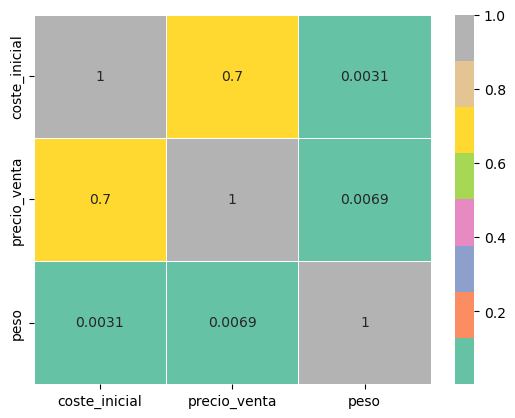

In [42]:
# investigamos las correlaciones de las columnas numéricas
correlacion_numericas = df[["coste_inicial", "precio_venta", "peso"]].corr()
sns.heatmap(correlacion_numericas, cmap = colors, annot = True, linewidth = .5)
plt.show()

Observamos la correlación positiva entre las variables coste_inicial y precio_venta. Al contrario, hay una correlación bastante débil entre esas dos variables y la variable del peso.

In [43]:
# hacemos un scatter plot de 10 muestras
# en el caso de mostrar todo dataframe resulta imposible hacer alguna observación por la cantidad de datos que tenemos
fig_scatter = px.scatter(color_discrete_sequence = colors)
for i in range(10):
    df_scatter = df.sample(1000)
    fig_scatter.add_scatter(x = df_scatter["coste_inicial"], y = df_scatter["precio_venta"], mode = "markers", name = f"Muestra {i+1}")
    
fig_scatter.update_xaxes(title_text = "coste_inicial")
fig_scatter.update_yaxes(title_text = "precio_venta")
fig_scatter.update_layout(title_text = "Relacón entre coste_incial y precio_venta", title_x = 0.5, showlegend = True, 
                          plot_bgcolor = "rgba(255, 255, 255, 0.1)", paper_bgcolor = "rgba(255, 255, 255, 0.95)",
                          height = 500, width = 1080)
fig_scatter.show()

Observamos que la mayoría de valores se encuantran entre 1.5 y 2.5 en coste inicial y 2.5 y 4 en precio_venta. También podemos observar outliers de precios menores y mayores.

In [44]:
# añadimos columnas únicamente con fechas para investigar cambios durante el mes
df["tiempo_recogida"] = pd.to_datetime(df["tiempo_recogida"])
df["tiempo_venta"] = pd.to_datetime(df["tiempo_venta"])

df["fecha_recogida"] = df["tiempo_recogida"].dt.date
df["fecha_venta"] = df["tiempo_venta"].dt.date

In [45]:
# vizualizamos la cantidad de fruta recogida durante el mes
recogida_fruta = df.groupby(["fecha_recogida", "tipo"]).agg(count = ("tipo", "count")).reset_index()
fig_recogida = px.line(recogida_fruta, x = "fecha_recogida", y = "count", color = "tipo", color_discrete_sequence = colors)
fig_recogida.update_layout(plot_bgcolor = "rgba(255, 255, 255, 0.1)", paper_bgcolor = "rgba(255, 255, 255, 0.95)", 
                       title_text = "Cantidad de Fruta Recogida por Fecha", title_x = 0.5, legend_title_text = "Tipo de Fruta",
                       height = 500, width = 1080)
fig_recogida.update_xaxes(title_text = "Fecha de Recogida")
fig_recogida.update_yaxes(title_text = "Cantidad de Fruta")
fig_recogida

In [46]:
# vizualizamos la cantidad de fruta vendida
venta_fruta = df.groupby(["fecha_venta", "tipo"]).agg(count = ("tipo", "count")).reset_index()
fig_venta = px.line(venta_fruta, x = "fecha_venta", y = "count", color = "tipo", color_discrete_sequence = colors)
fig_venta.update_layout(plot_bgcolor = "rgba(255, 255, 255, 0.1)", paper_bgcolor = "rgba(255, 255, 255, 0.95)", 
                       title_text = "Cantidad de Fruta Vendida por Fecha", title_x = 0.5, legend_title_text = "Tipo de Fruta",
                       height = 500, width = 1080)
fig_venta.update_xaxes(title_text = "Fecha de Venta")
fig_venta.update_yaxes(title_text = "Cantidad de Fruta")
fig_venta

Observamos que el top-3 de fruta se mantiene en el aspecto temporal. Tenemos algunos valores de 31 de agosto y 1 de octubre, creemos que no es útil usarlos para calcular los KPIs.

In [47]:
# vizualización de recogida por peso 
recogida_peso = df.groupby(["fecha_recogida", "tipo"]).agg(peso = ("peso", "sum")).reset_index()
fig_peso = px.line(recogida_peso, x = "fecha_recogida", y = "peso", color = "tipo", color_discrete_sequence = colors)
fig_peso.update_layout(plot_bgcolor = "rgba(255, 255, 255, 0.1)", paper_bgcolor = "rgba(255, 255, 255, 0.95)", 
                       title_text = "Peso de Fruta Recogida por Fecha", title_x = 0.5, legend_title_text = "Tipo de Fruta",
                       height = 500, width = 1080)
fig_peso.update_xaxes(title_text = "Fecha de Recogida")
fig_peso.update_yaxes(title_text = "Peso de Fruta")
fig_peso

Con peso de la fruta recogida observamos la misma tendencia que con cantidad. 

### 3.5.3 Cuestión de peso

Del guión: 
> A cada proveedor no se le pueden vender en un mismo día más de 100kg de una misma fruta.

**Importante**: peso es en gramos del producto.

In [48]:
# agrupamos por proveedor, fecha de venta y tipo de fruta con la suma de peso
agrupado_proveedor = df.groupby(["proveedor", "fecha_venta", "tipo"]).agg({"peso" : "sum"}).reset_index()

In [49]:
# añadimos la columna de peso en kilos
agrupado_proveedor["peso_kg"] = agrupado_proveedor["peso"] / 1000

In [50]:
# observamos si algunos proveedores exceden el limite de 100 kilos
agrupado_proveedor[agrupado_proveedor["peso_kg"] > 100]

Empty DataFrame
Columns: [proveedor, fecha_venta, tipo, peso, peso_kg]
Index: []

**Conclusión**: no hay proveedores que vendieron más de 100kg de la misma fruta el mismo día.

## 3.6 Fruta Dañada

Buscamos donde **tiempo_venta** es nulo y lo consideramos la fruta dañada.
> Suponiendo que si no se dispone de información de venta se trata de una fruta que no ha podido venderse por haber sido dañada durante la distribución. 

In [51]:
# creamos dataframe con fruta dañada
fruta_danada = df[df["tiempo_venta"].isnull()]

In [52]:
fruta_danada.isnull().sum()

t_id                 0
tipo                 0
tiempo_recogida      0
categoria            0
numero_lote          0
marca                0
coste_inicial        3
proveedor            0
cliente              0
tiempo_venta       218
precio_venta         2
peso                 0
fecha_recogida       0
fecha_venta        218
dtype: int64

In [53]:
# añadimos columna que indica si la fruta se ha dañado
df["fruta_danada"] = np.where(df["tiempo_venta"].notnull(), 0, 1)

In [54]:
# vizualizamos fruta dañada 
fig_tarta = px.pie(df, names = "fruta_danada", title = "% de Fruta Dañada", labels = {"fruta_danada" : "Fruta Dañada"}, 
                   color_discrete_sequence = colors)
fig_tarta.update_layout(title_x = 0.5, width = 600, height = 400, plot_bgcolor = "rgba(255, 255, 255, 0.1)", 
                        paper_bgcolor = "rgba(255, 255, 255, 0.95)")
fig_tarta

In [55]:
# considerandos que la fruta dañada no se ha podido vender y actualizamos el precio_venta y cliente al nulo
df.loc[df["fruta_danada"] == 1, "precio_venta"] = np.nan
df.loc[df["fruta_danada"] == 1, "cliente"] = np.nan

## 3.7 Nulos

In [56]:
df.isnull().sum()

t_id                  0
tipo                  0
tiempo_recogida       0
categoria             0
numero_lote           0
marca                 0
coste_inicial      1967
proveedor             0
cliente             218
tiempo_venta        218
precio_venta        891
peso                  0
fecha_recogida        0
fecha_venta         218
fruta_danada          0
dtype: int64

**coste_inicial** - hay que mirar nulos  
**tiempo_venta** - los nulos corresponden a la fruta dañada así que por ahora lo dejamos así  
**precio_venta** - hay que mirar nulos (tener en cuenta algunos son por nulos de tiempo_venta) 

In [57]:
# definimos media y mediana y las comparamos
media_i = df["coste_inicial"].mean()
mediana_i = df["coste_inicial"].median()
print(f"coste_inicial\nmedia: {media_i}\nmediana: {mediana_i}")

media_v = df["precio_venta"].mean()
mediana_v = df["precio_venta"].median()
print(f"\nprecio_venta\nmedia: {media_v}\nmediana: {mediana_v}")

coste_inicial
media: 2.0000182921181406
mediana: 1.9996666692827443

precio_venta
media: 3.4991059943610283
mediana: 3.4992146648102143


**Conclusión**: no se varían media y mediana, así que podemos concluir que los outliers no tienen influencia significativa en la media.

### 3.7.1 Coincidencias de nulos

Vamos a buscar cuantos casos donde coste_inicial y precio_venta son nulos.

In [58]:
nulos = df[(df["coste_inicial"].isnull()) & (df["precio_venta"].isnull())]

In [59]:
nulos.shape

(25, 15)

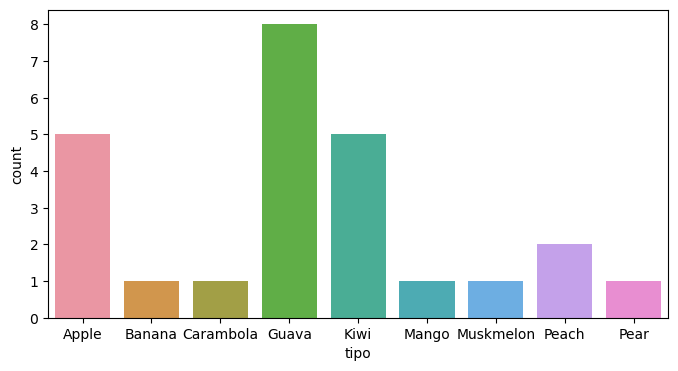

In [60]:
plt.figure(figsize = (8, 4))
sns.countplot(data = nulos, x = "tipo")
plt.show()

In [61]:
porc = round(nulos.shape[0] / (df["coste_inicial"].isnull().sum() + df["precio_venta"].isnull().sum()) * 100, 2)
print(f"El porcentraje de fruta que tiene valores de coste_inicial y precio_venata entre los demás nulos es {porc}")

El porcentraje de fruta que tiene valores de coste_inicial y precio_venata entre los demás nulos es 0.87


La proporción de nulos coincidentes es muy baja y no observamos ningún tipo de coincidencias entre valores categóricos. Como sabemos, top-3 de fruta son guava, manzana y kiwi así que consideramos lógico que hayan más coincidencias de esos tipos de fruta mientras no hay ocurrencias de la fruta con menor cantidad vendida (tomate).   
Ya que los valores de ambas columnas son nulos, vamos a eliminarlos.

In [62]:
df.dropna(subset = ["coste_inicial", "precio_venta"], how = "all", inplace = True)

### 3.7.2 Nulos de coste_inicial

In [63]:
nulos_i = df[df["coste_inicial"].isnull()]
nulos_i.head()

t_id   tipo     tiempo_recogida categoria         numero_lote  \
41   Apple 136.png  Apple 2022-09-10 08:00:00   Apple A  G80V76K49O54J80T71   
100   Apple 19.png  Apple 2022-09-18 19:00:00   Apple A    G80V76K49U46V78M   
123   Apple 21.png  Apple 2022-09-26 03:00:00   Apple A    G80V76K50M46V78M   
205  Apple 284.png  Apple 2022-09-08 08:00:00   Apple A  G80V76K50T52J80T71   
223   Apple 30.png  Apple 2022-09-14 18:00:00   Apple A    G80V76K51L46V78M   

                marca  coste_inicial                           proveedor  \
41      Dulce Encanto            NaN         Silos y Almacenes AgroVault   
100       Fruta Dulce            NaN                 BioCosecha Orgánica   
123      Fiesta Sabor            NaN  AgroQuímicos Naturales BioCultivos   
205  Fantasía Delicia            NaN         Semillero Genético BioCampo   
223  Vibrante Sabores            NaN         Silos y Almacenes AgroVault   

                   cliente        tiempo_venta      precio_venta  \
41   Distribuidora Gourmet 2022-09-10 12:00:00 4.076714725514104   
100        Maxi Descuentos 2022-09-18 22:00:00 4.224428291897022   
123     Mercado del Barrio 2022-09-26 10:00:00 3.963280194936914   
205            Mega Compra 2022-09-08 12:00:00 2.913011727692557   
223       Almacén Estrella 2022-09-14 21:00:00 3.162584180035072   

                   peso fecha_recogida fecha_venta  fruta_danada  
41  321.775543062577242     2022-09-10  2022-09-10             0  
100 143.432122301517438     2022-09-18  2022-09-18             0  
123 272.940801768880476     2022-09-26  2022-09-26             0  
205 343.845281555068880     2022-09-08  2022-09-08             0  
223 269.680212682337753     2022-09-14  2022-09-14             0

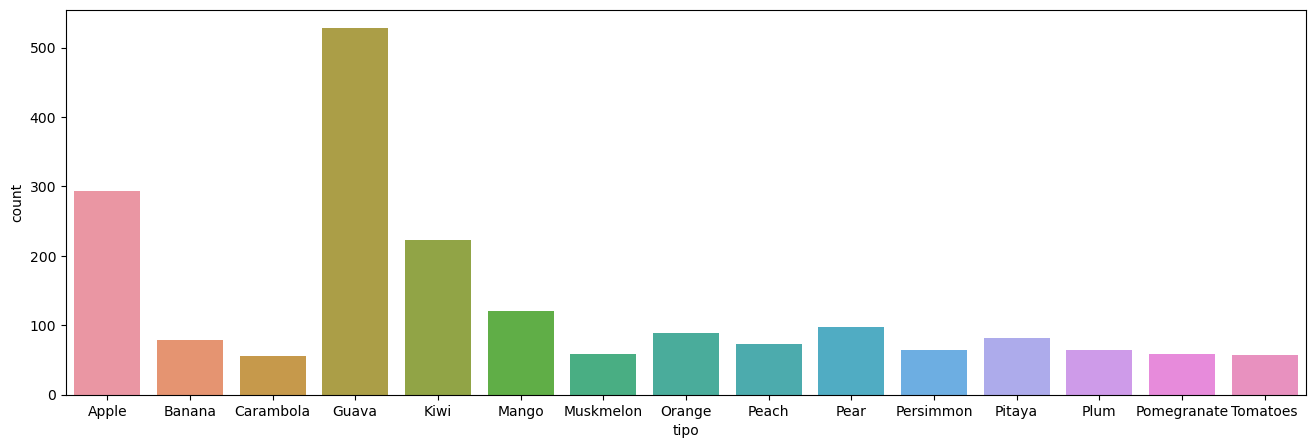

In [64]:
plt.figure(figsize = (16, 5))
sns.countplot(data = nulos_i, x = "tipo")
plt.show()

La fruta de top-3 (guava, apple, kiwi) es la que más ocurrencia de nulos tiene.  
Vamos a comparar la proporción de nulos de diferentes tipos de fruta y la cantidad total de esa fruta.

In [65]:
count_fruta = df.groupby("tipo").agg(count_tipo = ("tipo", "count")).reset_index()
nulos_i_total = count_fruta.merge(nulos_i.groupby("tipo").agg(count_tipo = ("tipo", "count")).reset_index(), on = "tipo")
nulos_i_total["porcentaje_nulos"] = (nulos_i_total["count_tipo_y"] / nulos_i_total["count_tipo_x"]) 

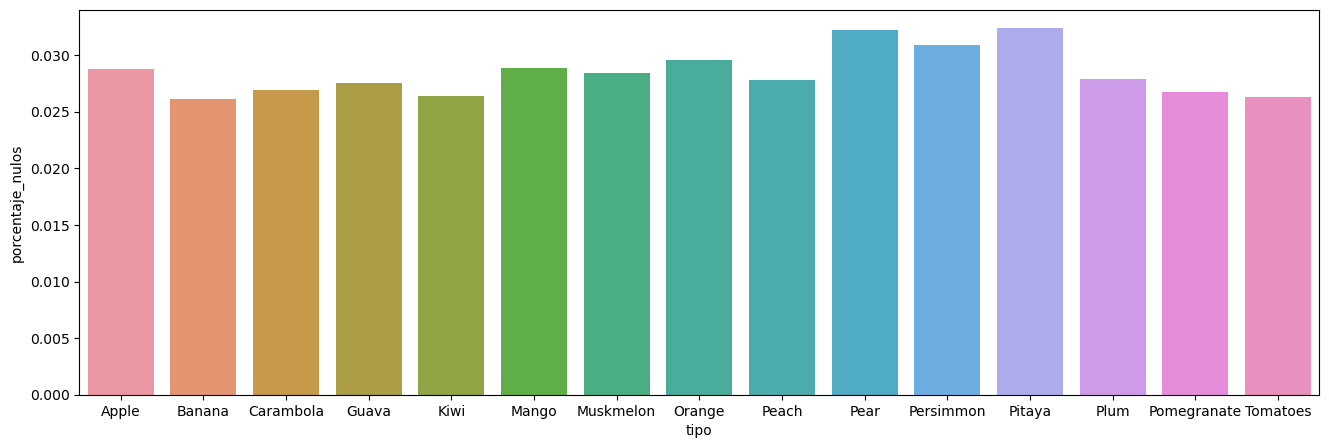

In [66]:
plt.figure(figsize = (16, 5))
sns.barplot(data = nulos_i_total, x = "tipo", y = "porcentaje_nulos") 
plt.show()

Observamos que porcentaje de nulos de cada tipo de fruta es bastante parecido y de normal tiene variación entre 2.5% y 3%.  
Vamos a definir la media de coste_inicial de cada fruta.

In [67]:
lista_fruta = df["tipo"].unique().tolist()
for fruta in lista_fruta:
    media_i = df[df["tipo"] == fruta]["coste_inicial"].mean()
    print(f"{fruta}: {media_i}")

Apple: 1.997877636504363
Banana: 1.9918021083442095
Carambola: 1.9931329612108792
Guava: 2.0024573278536835
Kiwi: 2.0039333001324553
Mango: 2.0065319497195855
Muskmelon: 1.9898509761357386
Orange: 2.005925152837262
Peach: 2.0061918018379346
Pear: 1.9972794474040538
Persimmon: 1.9884473768644755
Pitaya: 1.9985523386551516
Plum: 2.01095143974668
Pomegranate: 1.984578359199927
Tomatoes: 1.993300452448914


Podemos observar que hay pequeña variación entre coste_inicial de diferentes tipos de fruta, por eso vamos a rellenar los camplos nulos de coste_inicial con la media de cada fruta particular y no la media del dataset entero.

In [68]:
# creamos diccionario y asignamos media a cada tipo de fruta 
dic_fruta_i = {}
for fruta in lista_fruta:
    media = df[df["tipo"] == fruta]["coste_inicial"].mean()
    dic_fruta_i.update({fruta : media})

In [69]:
# creamos una funcion para asignar valores
def asignar_valor(fruta, dic_f):
    for key in dic_f.keys():
        return dic_f[key]

In [70]:
# cogemos la linea y si coste_inicial es nulo aplicamos asignar_valor, si tiene valor ya, mantenemos ese valor
df["coste_inicial"] = df.apply(lambda row: asignar_valor(row["tipo"], dic_fruta_i) 
                               if pd.isnull(row["coste_inicial"]) 
                               else row["coste_inicial"], axis = 1)

Asignamos nulos que habían a la media del tipo de fruta correspondiente.

In [71]:
df["coste_inicial"].isna().sum()

0

### 3.8.3 Nulos de precio_venta

In [72]:
# nulos de precio_venta excluyendo los de la fruta dañada
nulos_v = df[df["precio_venta"].isna() & df["tiempo_venta"].notna()]
nulos_v.shape

(651, 15)

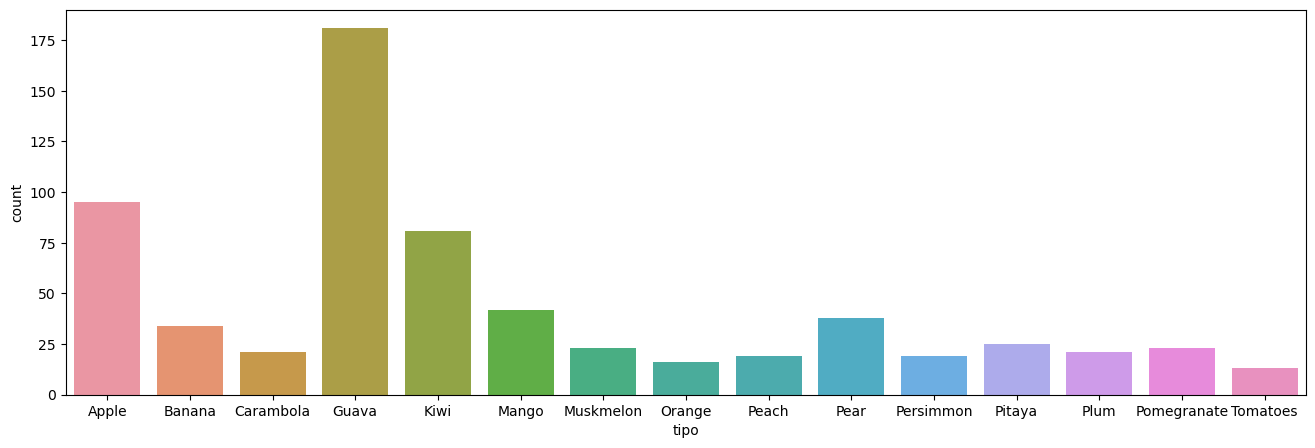

In [73]:
# vizualizamos la cantidad de nulos
plt.figure(figsize = (16, 5))
sns.countplot(data = nulos_v, x = "tipo")
plt.show()

In [74]:
# definimos el porcentaje de nulos respecto a la cantidad total de fruta
nulos_v_total = count_fruta.merge(nulos_v.groupby("tipo").agg(count_tipo = ("tipo", "count")).reset_index(), on = "tipo")
nulos_v_total["porcentaje_nulos"] = (nulos_v_total["count_tipo_y"] / nulos_v_total["count_tipo_x"])

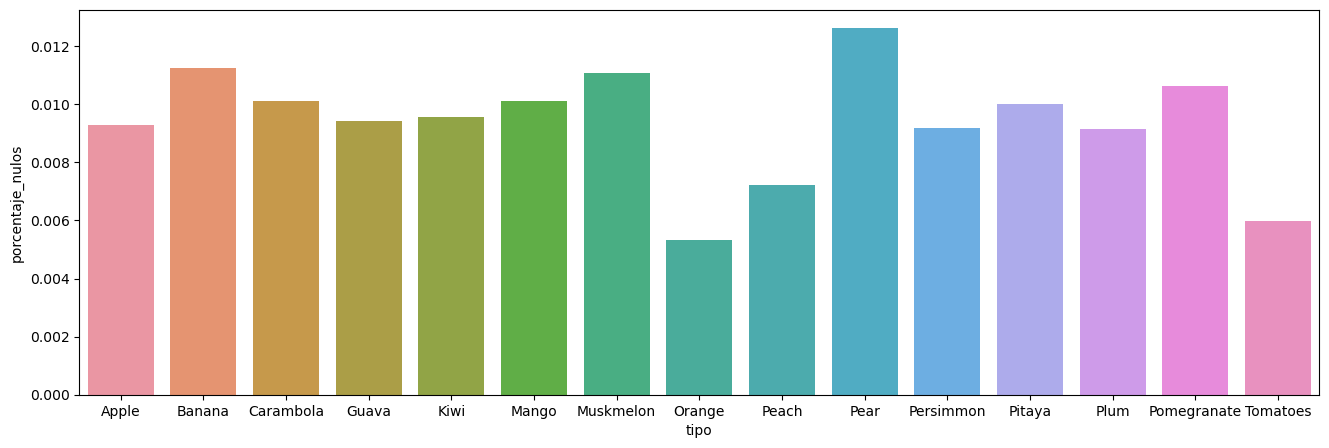

In [75]:
# vizualizamos el porcenraje
plt.figure(figsize = (16, 5))
sns.barplot(data = nulos_v_total, x = "tipo", y = "porcentaje_nulos")
plt.show()

En general el porcentaje de nulos en precio_venta es menor.   
Vamos a aplicar la misma práctica que con coste_inicial para asignar valores a los nulos.

In [76]:
dic_fruta_v = {}
for fruta in lista_fruta:
    media = df[df["tipo"] == fruta]["precio_venta"].mean()
    dic_fruta_v.update({fruta : media})

In [77]:
df["precio_venta"] = df.apply(lambda row: asignar_valor(row["tipo"], dic_fruta_v) 
                               if pd.isna(row["precio_venta"]) and pd.notna(row["tiempo_venta"]) 
                               else row["precio_venta"], axis = 1)

In [78]:
df["precio_venta"].isna().sum() 

215

De esa manera los nulos que quedan en la columa precio_venta son de la fruta que ha sido dañada.

### 3.8.4 Conteo de nulos

In [79]:
df.isna().sum()

t_id                 0
tipo                 0
tiempo_recogida      0
categoria            0
numero_lote          0
marca                0
coste_inicial        0
proveedor            0
cliente            215
tiempo_venta       215
precio_venta       215
peso                 0
fecha_recogida       0
fecha_venta        215
fruta_danada         0
dtype: int64

De esta manera nos quedamos con nulos de la fruta dañada.

## 3.8 Diferencia entre coste_inicial y precio_venta

In [80]:
# creamos columnas con dia de recogida para poder analizarlo posteriormente
df["dia_recogida"] = df["tiempo_recogida"].dt.day
df["dia_venta"] = df["tiempo_venta"].dt.day
df["dia_venta"] = df["dia_venta"].fillna(0).astype(int)

In [81]:
df["diferencia"] = df["precio_venta"] - df["coste_inicial"]
df[df["diferencia"] < 0].head()

t_id   tipo     tiempo_recogida categoria  \
261       Apple 334.png  Apple 2022-09-09 05:00:00   Apple A   
624       Apple 661.png  Apple 2022-09-05 12:00:00   Apple A   
2081  Apple De12241.png  Apple 2022-09-12 10:00:00   Apple D   
2575    applee06117.png  Apple 2022-09-08 17:00:00   Apple D   
2823     Apple E007.png  Apple 2022-09-08 06:00:00   Apple E   

                   numero_lote              marca     coste_inicial  \
261         G80V76K51O52J80T71   Vibrante Sabores 1.997877636504363   
624         G80V76K54R49J80T71  Sinfonía Delicias 1.997877636504363   
2081  G80V76K68K49N50P49J80T71        Arte Frutal 2.337657116127871   
2575    G80V76K69L54M49S46V78M    Frescura Mágica 1.997877636504363   
2823       G80V76K69L48S46V78M       Brisa Frutal 3.071294722874319   

                               proveedor                  cliente  \
261                RiegoSmart Innovación           Compra Maestra   
624          Cosechadoras Progresivas SA  Supermercados del Valle   
2081         Semillero Genético BioCampo            Compra Rápida   
2575  AgroQuímicos Naturales BioCultivos       Distribuidora Alfa   
2823        Maquinaria Agrícola Avanzada    El Bazar de la Comida   

            tiempo_venta      precio_venta                peso fecha_recogida  \
261  2022-09-09 09:00:00 1.727206698200853 316.933819108853413     2022-09-09   
624  2022-09-05 15:00:00 1.955636736875187 142.456172478917495     2022-09-05   
2081 2022-09-12 20:00:00 2.268501145949621 280.694055735015866     2022-09-12   
2575 2022-09-09 00:00:00 0.599383331576303 343.816838167894332     2022-09-08   
2823 2022-09-08 11:00:00 2.477025175473865 246.263693358175516     2022-09-08   

     fecha_venta  fruta_danada  dia_recogida  dia_venta         diferencia  
261   2022-09-09             0             9          9 -0.270670938303510  
624   2022-09-05             0             5          5 -0.042240899629176  
2081  2022-09-12             0            12         12 -0.069155970178250  
2575  2022-09-09             0             8          9 -1.398494304928060  
2823  2022-09-08             0             8          8 -0.594269547400454

In [82]:
df[df["diferencia"] <= 0].shape

(132, 18)

Podemos observar que en ciertos casos la diferencia entre estas columnas es negativa.    
Podemos suponer que la fruta se ha vendido por el precio menor que ha sido su coste inicial.

In [83]:
# investigamos los valores negativos por fecha
diferencia = df[df["diferencia"] <= 0]

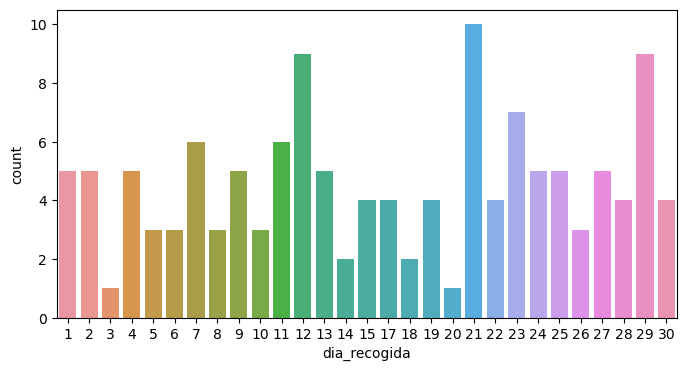

In [84]:
plt.figure(figsize = (8, 4))
sns.countplot(data = diferencia, x = "dia_recogida")
plt.show()

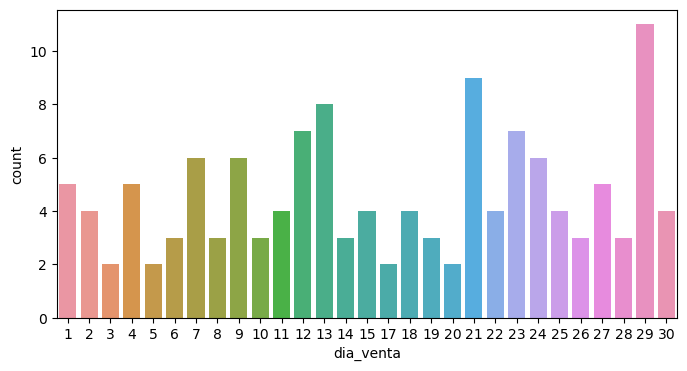

In [85]:
plt.figure(figsize = (8, 4))
sns.countplot(data = diferencia, x = "dia_venta")
plt.show()

Algunos días (7, 13, 21, 29) tienen picos, así que podrían ser fines de semana, días de promociones etc. Aunque la diferencia es solamente de 5-6 valores.

## 3.9 Outliers

### 3.9.1 peso

In [86]:
media_peso = df["peso"].mean()
mediana_peso = df["peso"].median()
std_peso = df["peso"].std()
print(f"{media_peso}, {mediana_peso}, {std_peso}")

300.22855028222097, 300.19332323766935, 99.99593421927635


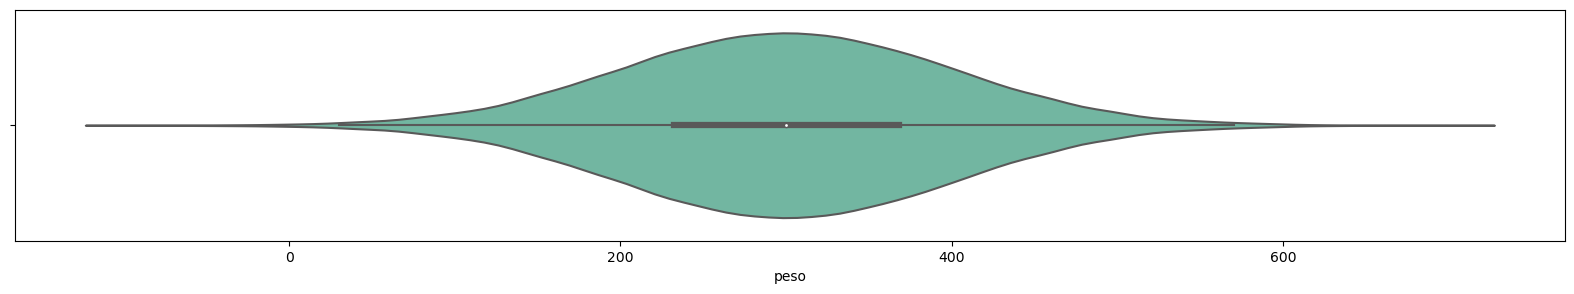

In [87]:
plt.figure(figsize = (20, 3))
sns.violinplot(data = df, x = "peso")
plt.show()

La *media* y la *mediana* de la columna peso tienen valores cerca una de la otra, lo que permite decir la distribución es bastante simétrica.  
La *desviación estándar* muestra el nivel moderado de la dispreción de los valores.

#### 3.9.1.1 peso negativo

Hipótesis: en algunos casos hubo un error al introducir los datos y han sido introducidos con valor negativo.

In [88]:
peso_neg = df[df["peso"] <= 0]
peso_neg.shape

(110, 18)

In [89]:
peso_neg.sample(5)

t_id       tipo     tiempo_recogida  \
6458     Apple 02118.png      Apple 2022-09-12 11:00:00   
12911     Banana0680.png     Banana 2022-09-20 00:00:00   
39182     Kiwi001321.png       Kiwi 2022-09-07 14:00:00   
56002      Pear 2018.png       Pear 2022-09-14 17:00:00   
59013  Persimmon2017.png  Persimmon 2022-10-01 04:00:00   

                        categoria                numero_lote  \
6458       Total Number of Apples      G80V76K48N49M56J80T71   
12911                      Banana      H65T65T65L54T48J80T71   
39182  Total Number of Kiwi fruit      Q73G73L48M51N49J80T71   
56002                        Pear         V69G82N48M56J80T71   
59013                   Persimmon  V69B83O77S79T50L49S46V78M   

                  marca     coste_inicial                    proveedor  \
6458   Maravilla Jugosa 1.756913425673658  Semillero Genético BioCampo   
12911    Gourmet Frutas 1.638541577628613              Apícola EcoMiel   
39182  Maravilla Jugosa 1.729141877499463  Silos y Almacenes AgroVault   
56002      Jugoso Aroma 2.147703676655937      AgroSoftware Soluciones   
59013    Tropical Sabor 1.356411797711495     Agrícola Solaris Energía   

                      cliente        tiempo_venta      precio_venta  \
6458               Eco Tienda 2022-09-12 22:00:00 3.170834553708208   
12911  Eco Mercado Sostenible 2022-09-20 01:00:00 2.659302161898103   
39182         Super Económico 2022-09-07 21:00:00 2.807979043092379   
56002    Mercado Fresco X Y Z 2022-09-14 22:00:00 3.916491385713016   
59013         Super Económico 2022-10-01 14:00:00 2.667386946774196   

                     peso fecha_recogida fecha_venta  fruta_danada  \
6458  -25.410905477164818     2022-09-12  2022-09-12             0   
12911 -49.678104650275316     2022-09-20  2022-09-20             0   
39182 -17.753903062986012     2022-09-07  2022-09-07             0   
56002  -6.446539673316295     2022-09-14  2022-09-14             0   
59013 -33.908597193939841     2022-10-01  2022-10-01             0   

       dia_recogida  dia_venta        diferencia  
6458             12         12 1.413921128034551  
12911            20         20 1.020760584269490  
39182             7          7 1.078837165592916  
56002            14         14 1.768787709057079  
59013             1          1 1.310975149062701

In [90]:
peso_neg["peso"].median()

-25.52608032765798

Hipótesis no confirmada.  
Para esos vamores negativos vamos a eliminarlos, claramente es un error.

In [91]:
df.drop(df[df["peso"] <= 0].index , inplace = True)

In [92]:
df[df["peso"] <= 0]

Empty DataFrame
Columns: [t_id, tipo, tiempo_recogida, categoria, numero_lote, marca, coste_inicial, proveedor, cliente, tiempo_venta, precio_venta, peso, fecha_recogida, fecha_venta, fruta_danada, dia_recogida, dia_venta, diferencia]
Index: []

#### 3.9.1.2 definimos outliers

In [93]:
IQR_p = df["peso"].quantile(0.75) - df["peso"].quantile(0.25)
filtro_p_menos = (df["peso"] < (mediana_peso - 1.5 * IQR_p))
filtro_p_mas =  (df["peso"] > (mediana_peso + 1.5 * IQR_p))

In [94]:
outliers_peso_menos = df[filtro_p_menos]
outliers_peso_menos.shape

(1370, 18)

In [95]:
# consultamos la media de outliers del umbral menor
outliers_peso_menos["peso"].mean()

66.26631474437293

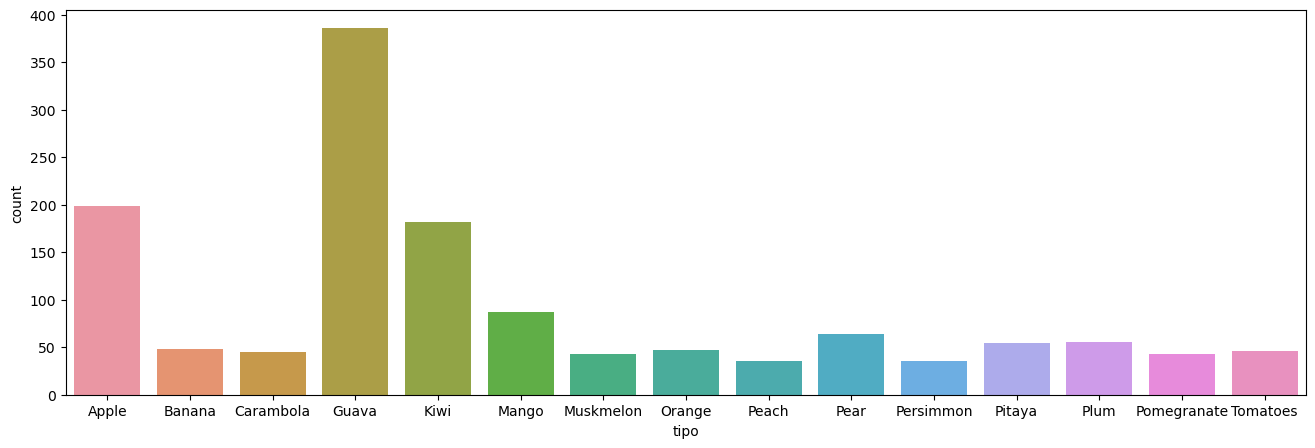

In [96]:
# vizualizamos su cantidad por la cantidad de cada fruta
plt.figure(figsize = (16, 5))
sns.countplot(data = outliers_peso_menos, x = "tipo")
plt.show()

Se puede observar la tendencia del dataframe entero, con top-3 y los demás de cantidad bastante parecida.

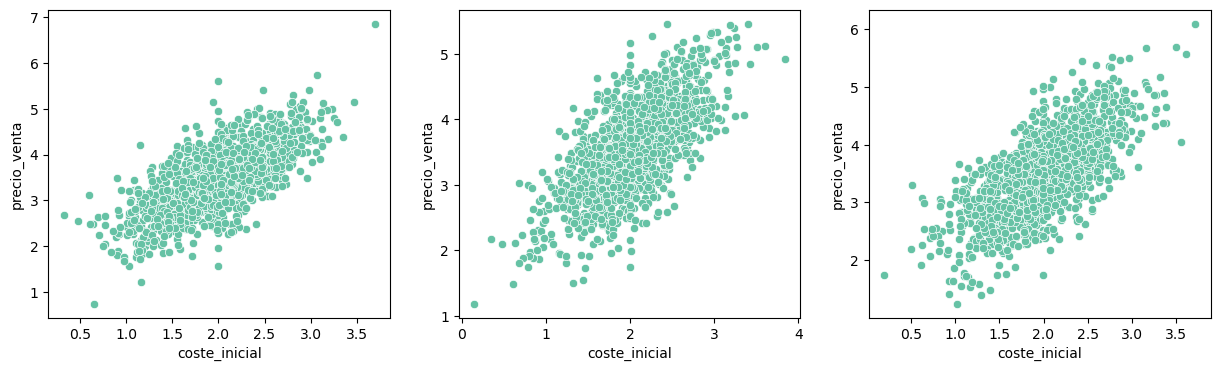

In [97]:
# comparamos la relacion de coste_inicial y precio venta de outliers y de dos muestras aleatorios del df original
fig, ax = plt.subplots(1, 3, figsize = (15, 4))
sns.scatterplot(outliers_peso_menos, x = "coste_inicial", y = "precio_venta", ax = ax[0])
for i in range(2):
    sample = df.sample(1400)
    sns.scatterplot(sample, x = "coste_inicial", y = "precio_venta", ax = ax[i+1])
plt.show()

Observamos que en general los outliers de peso se mantienen dentro de umbral general de la correlación entre coste_inicial y precio_venta. Aunque también podemos observar ciertos outliers dentro de scatter plot.

In [98]:
# vizualizamos con plotly para investigar precios de outliers
fig_outliers = px.scatter(outliers_peso_menos, x = "coste_inicial", y = "precio_venta", color = "tipo", size = "peso",
                         labels={"coste_inicial": "Coste Inicial", "precio_venta": "Precio Venta", "tipo": "Tipo"})
fig_outliers.update_layout(height = 600, width = 800)
fig_outliers

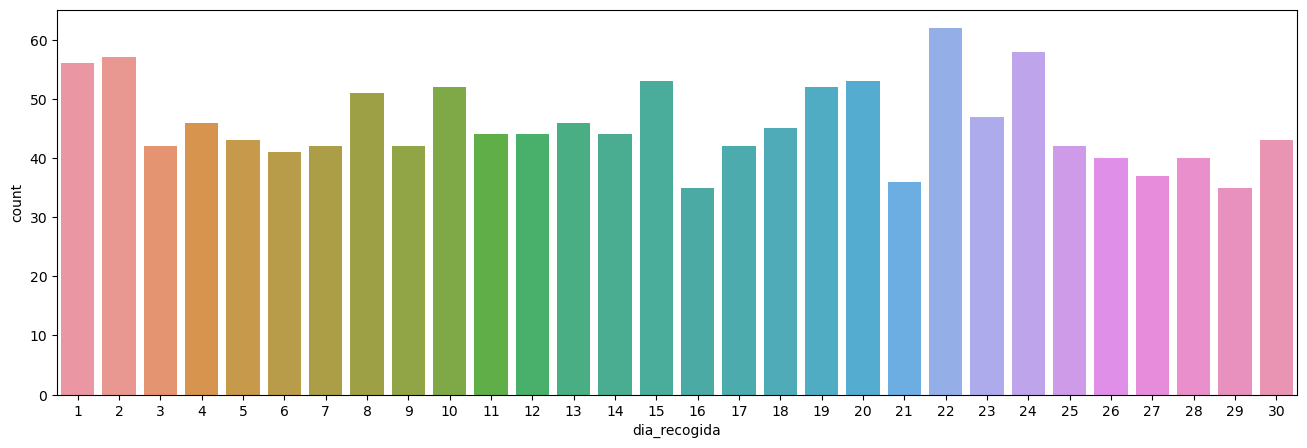

In [99]:
plt.figure(figsize = (16, 5))
sns.countplot(data = outliers_peso_menos, x = "dia_recogida")
plt.show()

Se puede decir que no hay ninguna fecha que destaca considerablemente.

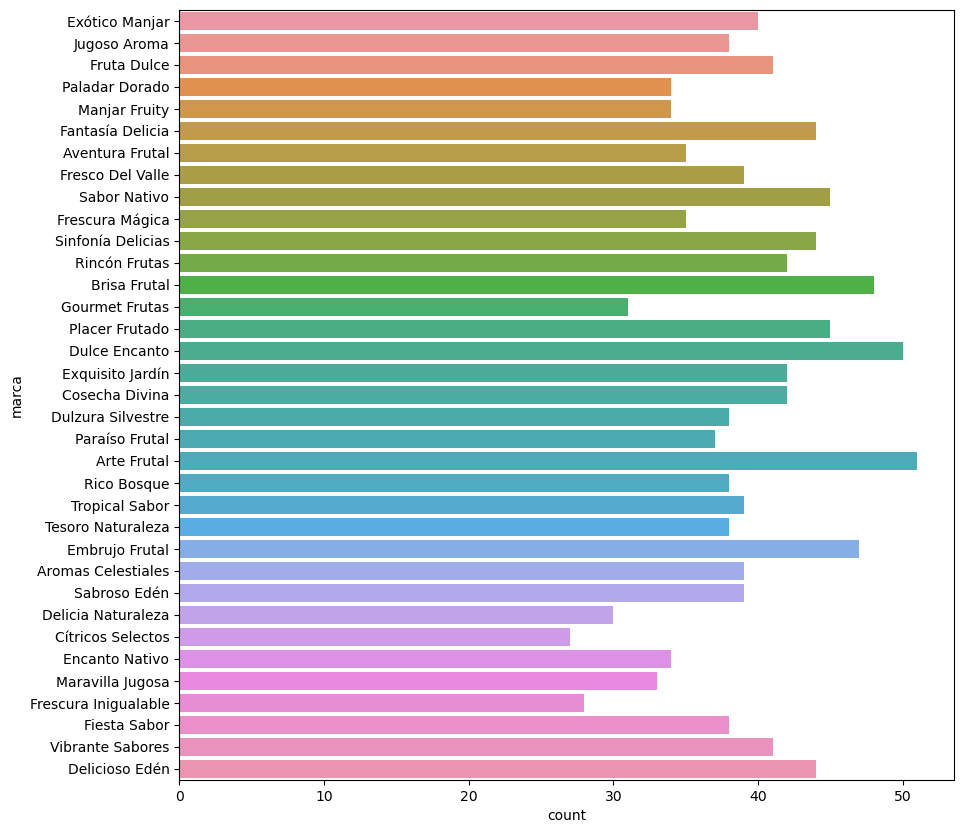

In [100]:
# vizualizamos por marca
plt.figure(figsize = (10, 10))
sns.countplot(data = outliers_peso_menos, y = "marca")
plt.show()

No observamos que alguna marca destaque considerablemente. Podemos decir que las siguientes marcas tienen más valore por debajo del umbral: Brisa Frutal, Embrujo Frutal, Dulce Encanto, Arte Frutal.

In [101]:
# pasamos a investigar outliers por encima del IQR por 1,5
outliers_peso_mas = df[filtro_p_mas]
outliers_peso_mas.shape

(1431, 18)

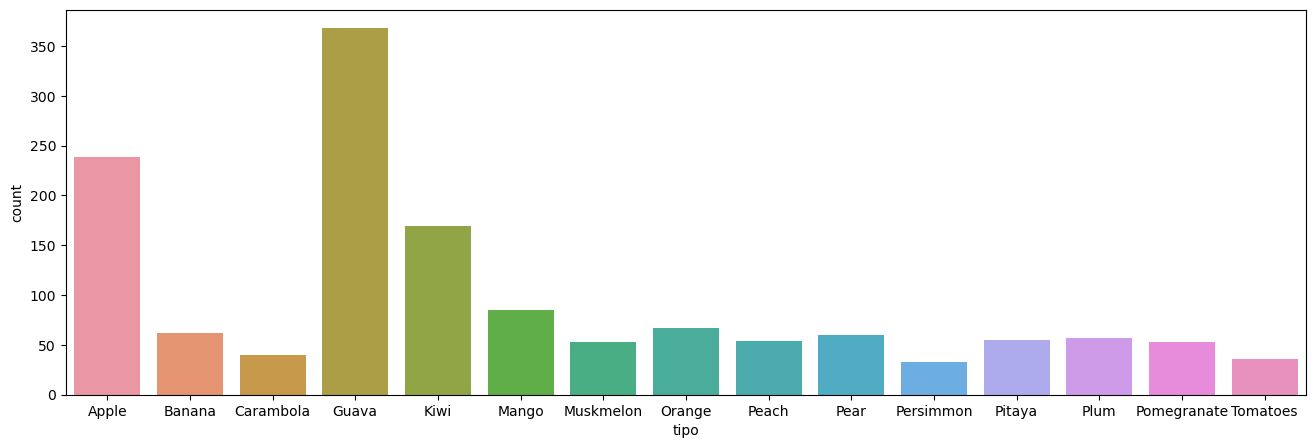

In [102]:
plt.figure(figsize = (16, 5))
sns.countplot(data = outliers_peso_mas, x = "tipo")
plt.show()

In [103]:
# vizualizamos con plotly para investigar precios de outliers
fig_outliers = px.scatter(outliers_peso_mas, x = "coste_inicial", y = "precio_venta", color = "tipo", size = "peso",
                         labels={"coste_inicial": "Coste Inicial", "precio_venta": "Precio Venta", "tipo": "Tipo"})
fig_outliers.update_layout(height = 600, width = 800)
fig_outliers

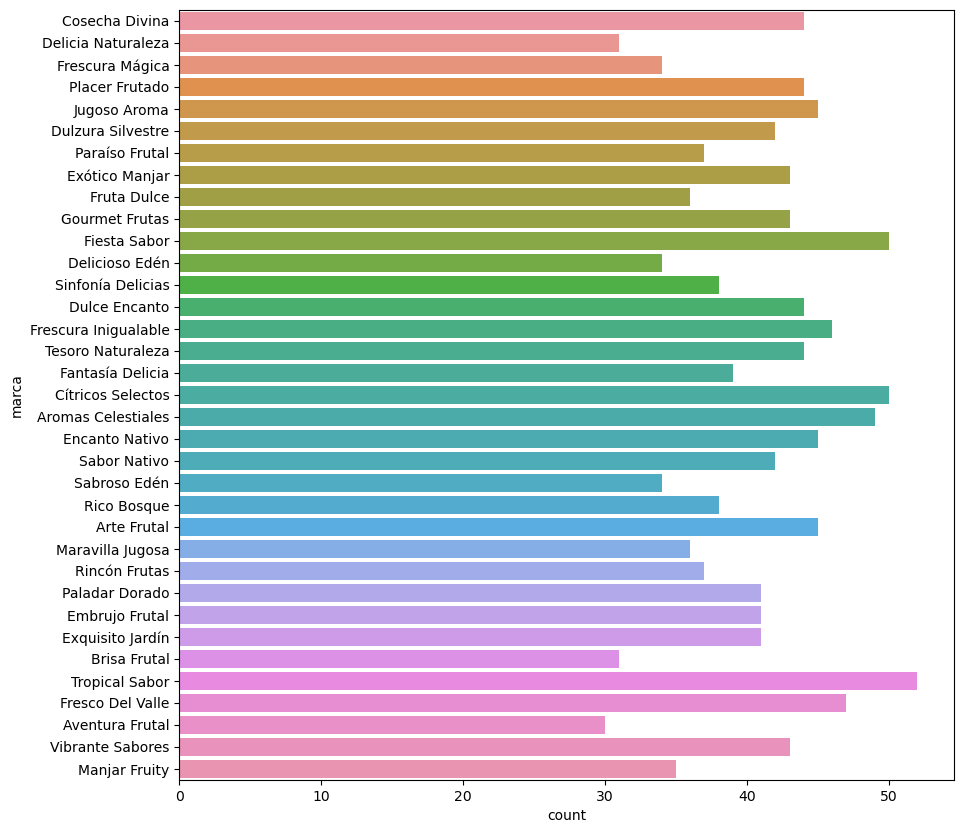

In [104]:
# vizualizamos por marca
plt.figure(figsize = (10, 10))
sns.countplot(data = outliers_peso_mas, y = "marca")
plt.show()

En general observamos la tendencia muy parecida a otro dataframe de outliers de peso. 

### 3.9.2 coste_inicial

In [105]:
media_i = df["coste_inicial"].mean()
mediana_i = df["coste_inicial"].median()
std_i = df["coste_inicial"].std()
print(f"{media_i}, {mediana_i}, {std_i}")

1.999992227332857, 1.997877636504363, 0.4913460745207689


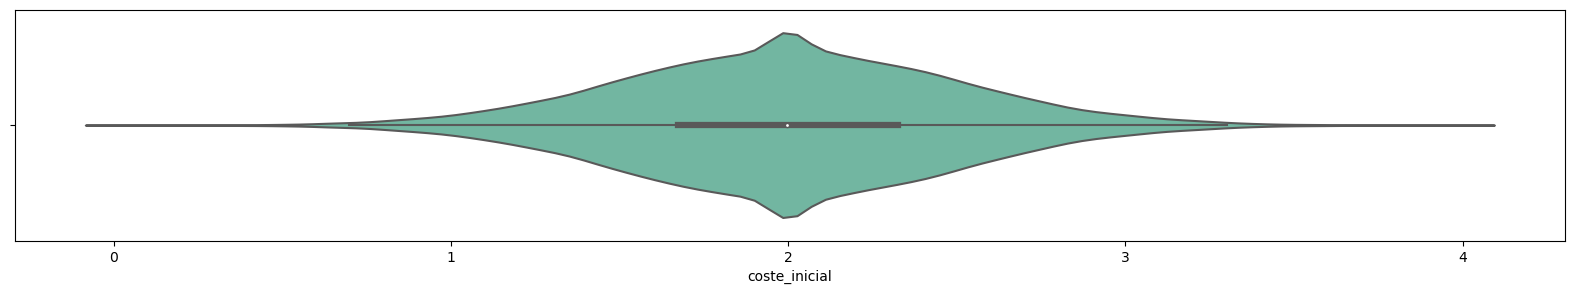

In [106]:
plt.figure(figsize = (20, 3))
sns.violinplot(data = df, x = "coste_inicial")
plt.show()

In [107]:
IQR_i = df["coste_inicial"].quantile(0.75) - df["coste_inicial"].quantile(0.25)
filtro_i = (df["coste_inicial"] < (mediana_i - 1.5 * IQR_i)) | (df["coste_inicial"] > (mediana_i + 1.5 * IQR_i))

In [108]:
# vamos a mirar los outliers de coste_inicial 
outliers_i = df[filtro_i]
outliers_i.shape

(3420, 18)

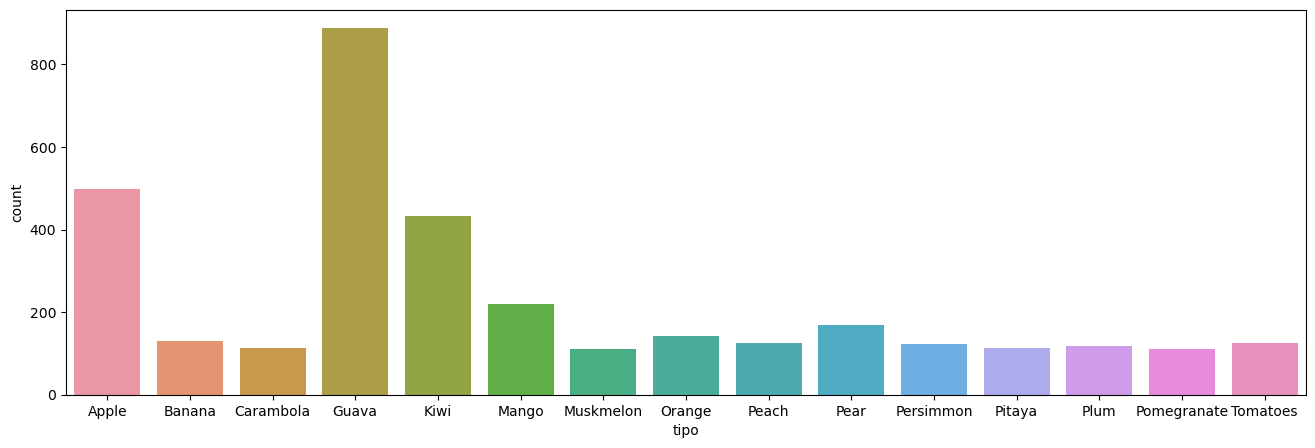

In [109]:
# vizualizamos la cantidad de fruta
plt.figure(figsize = (16, 5))
sns.countplot(data = outliers_i, x = "tipo")
plt.show()

In [110]:
# vamos a mirar la relacion entre esos valores con precio_venta con scatter plot
fig_outliers_i = px.scatter(outliers_i, x = "coste_inicial", y = "precio_venta", color = "tipo")
fig_outliers_i.update_layout(height = 600, width = 800)
fig_outliers_i

Vizualmente observamos que algunos valores pueden coincidir dentro de ser outliers en las dos columnas.   
Procedemos a definir los outliers de precio_venta y vamos a mirar los casos cuando los outliers de las dos columnas coinciden.

### 3.9.3 precio_venta

In [111]:
media_v = df["precio_venta"].mean()
mediana_v = df["precio_venta"].median()
std_v = df["precio_venta"].std()
print(f"{media_v}, {mediana_v}, {std_v}")

3.4991027774682784, 3.4911950756675414, 0.7031067161274905


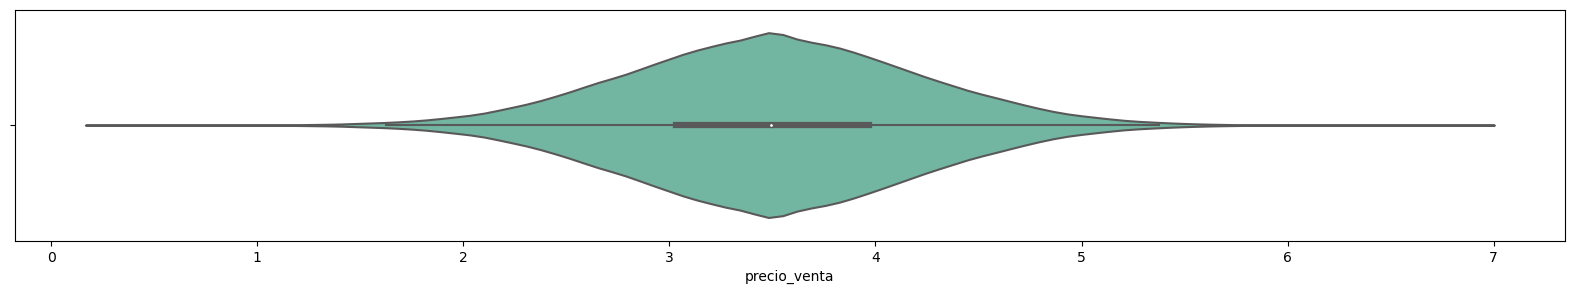

In [112]:
plt.figure(figsize = (20, 3))
sns.violinplot(data = df, x = "precio_venta")
plt.show()

In [113]:
IQR_v = df["precio_venta"].quantile(0.75) - df["precio_venta"].quantile(0.25)
filtro_v = (df["precio_venta"] < (mediana_v - 1.5 * IQR_v)) | (df["precio_venta"] > (mediana_v + 1.5 * IQR_v))

In [114]:
outliers_v = df[filtro_v]
outliers_v.shape

(3132, 18)

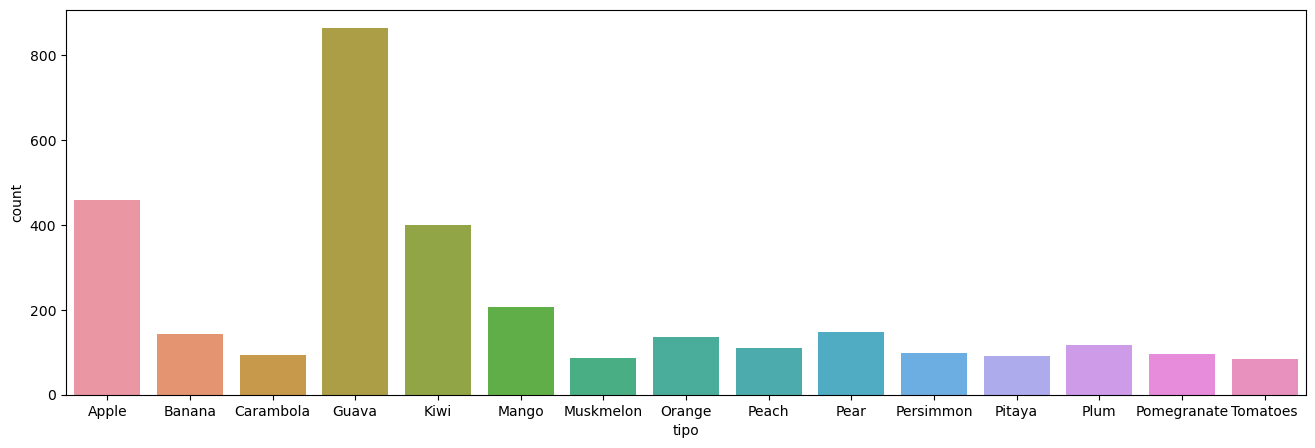

In [115]:
# vizualizamos la cantidad de fruta
plt.figure(figsize = (16, 5))
sns.countplot(data = outliers_v, x = "tipo")
plt.show()

In [116]:
# vamos a mirar la relacion entre esos valores con coste_inicial con scatter plot
fig_outliers_v = px.scatter(outliers_v, x = "coste_inicial", y = "precio_venta", color = "tipo")
fig_outliers_v.update_layout(height = 600, width = 800)
fig_outliers_v

### 3.9.4 coincidencias

In [117]:
outliers_precio = pd.merge(outliers_i, outliers_v, on = ["coste_inicial", "precio_venta"])

In [118]:
outliers_precio.shape

(1024, 34)

In [119]:
fig_outliers_precio = px.scatter(outliers_precio, x = "coste_inicial", y = "precio_venta", color = "tipo_x")
fig_outliers_precio.update_layout(height = 600, width = 800)
fig_outliers_precio

Concideramos algo acorde con la correlación de que los outliers de estas dos columnas coincidan.

## 3.10 Cuestión de tiempo

Del guión:
> Como mínimo se tarda un día desde que la fruta se recoge hasta que llega al cliente final.

In [120]:
# creamos la columna de diferencia entre tiempo_recogida y tiempo_camino
df["tiempo_camino"] = df["tiempo_venta"] - df["tiempo_recogida"] 

In [121]:
# cuando perido entre tiempo_recogida y tiempo_venta es mayor de 1 día
tiempo_camino_mas = df[df["tiempo_camino"] > pd.Timedelta(1, "D")]

In [122]:
tiempo_camino_mas.shape

(0, 19)

No existen esos valores y la diferencia normalmente es de menos de 1 día.

### 3.10.1 Investagación de tiempo_camino

In [123]:
# cuando el tiempo_camino es menor que 0
tiempo_camino_menos = df[df["tiempo_camino"] < pd.Timedelta(0, "H")]
tiempo_camino_menos.sort_values(by = "tiempo_camino").sample(10)

t_id    tipo     tiempo_recogida  \
43937                   Mango001846.png   Mango 2022-09-18 08:00:00   
2878                    Apple E0374.png   Apple 2022-09-25 21:00:00   
41436                    Kiwi003350.png    Kiwi 2022-09-06 03:00:00   
32031                    Guava02356.png   Guava 2022-09-22 21:00:00   
45967                   Mango003673.png   Mango 2022-09-21 16:00:00   
49847                  Orange001556.png  Orange 2022-09-06 02:00:00   
55551                     Pear 1612.png    Pear 2022-09-20 10:00:00   
4225                Apple F _0_8996.png   Apple 2022-09-21 11:00:00   
15975                      ene07681.png   Guava 2022-09-02 02:00:00   
22599  GuavaÒÇé1441 resized resized.png   Guava 2022-09-16 21:00:00   

                        categoria  \
43937                       Mango   
2878                      Apple E   
41436  Total Number of Kiwi fruit   
32031           guava total final   
45967                       Mango   
49847                      Orange   
55551                        Pear   
4225                      Apple F   
15975                     guava A   
22599                 Guava total   

                                           numero_lote              marca  \
43937                           S65T71U48L49T52R46V78M       Jugoso Aroma   
2878                             G80V76K69L51S52J80T71        Rico Bosque   
41436                            Q73G73L48O51Q48J80T71  Tesoro Naturaleza   
32031                            M85G86G48N51Q54J80T71     Paraíso Frutal   
45967                           S65T71U48L51R55O46V78M  Tesoro Naturaleza   
49847                         U82G78M69L48M53Q54J80T71   Maravilla Jugosa   
55551                               V69G82M54M50J80T71     Placer Frutado   
4225                         G80V76K70O48O56U57R46V78M        Rico Bosque   
15975                               K78K48S54T49J80T71  Cítricos Selectos   
22599  M85G86G210I201M52P49B69C73J69J82K83O90K68J80T71   Exquisito Jardín   

          coste_inicial                     proveedor                 cliente  \
43937 1.120578628510583  Maquinaria Agrícola Avanzada      Super Ofertas Plus   
2878  2.264010746563006         EcoFungicidas Morales         Super Económico   
41436 1.853933199728234         EcoFungicidas Morales       Alimentos Premium   
32031 1.704159161022789         Fitosanitarios BioPro  Distribuciones del Sol   
45967 2.232689217242587       AgroSoftware Soluciones          Compra Maestra   
49847 1.901831012930899     Agronutrientes del Futuro     Super Mercado Ideal   
55551 1.805864779282300  Tractores Eficientes Delgado   Distribuidora Gourmet   
4225  1.674408211135157               Apícola EcoMiel        Comercial Fresco   
15975 2.092876417625082               Apícola EcoMiel      Super Ofertas Plus   
22599 1.198878367665606      Pecuaria Moderna Alcaraz  Distribuciones del Sol   

             tiempo_venta      precio_venta                peso  \
43937 2022-09-01 06:00:00 2.933722562642449 259.028420172705580   
2878  2022-09-25 17:00:00 3.975838986542734 374.821587746609509   
41436 2022-09-06 02:00:00 3.389331155046748 402.055668972791523   
32031 2022-08-31 20:00:00 3.838682465667244 413.806225397342700   
45967 2022-09-21 14:00:00 4.517143791510318 282.806412778635206   
49847 2022-09-01 06:00:00 3.423637774372291 406.505624516826344   
55551 2022-09-01 06:00:00 2.753153118986086 288.993534659611043   
4225  2022-09-21 10:00:00 2.846280840041676 251.441881069155443   
15975 2022-09-01 01:00:00 3.505446670598252 538.620844326360498   
22599 2022-08-31 23:00:00 2.995526417193914 390.818652904046871   

      fecha_recogida fecha_venta  fruta_danada  dia_recogida  dia_venta  \
43937     2022-09-18  2022-09-01             0            18          1   
2878      2022-09-25  2022-09-25             0            25         25   
41436     2022-09-06  2022-09-06             0             6          6   
32031     2022-09-22  2022-08-31             0            22       

In [124]:
print(f"Porcentaje de tiempo_camino mayor de un día: {round((tiempo_camino_mas.shape[0] / df.shape[0]) * 100, 2)}")
print(f"Porcentaje de tiempo_camino negativo: {round((tiempo_camino_menos.shape[0] / df.shape[0]) * 100, 2)}")
print(f"Porcentaje total de tiempo_camino irregular: {round(((tiempo_camino_menos.shape[0] + tiempo_camino_mas.shape[0]) / df.shape[0]) * 100, 2)}")

Porcentaje de tiempo_camino mayor de un día: 0.0
Porcentaje de tiempo_camino negativo: 1.07
Porcentaje total de tiempo_camino irregular: 1.07


#### Investigación por diferentes columnas

In [125]:
tiempo_irregular = df[(df["tiempo_camino"] < pd.Timedelta(0, "H"))]
tiempo_irregular.shape

(738, 19)

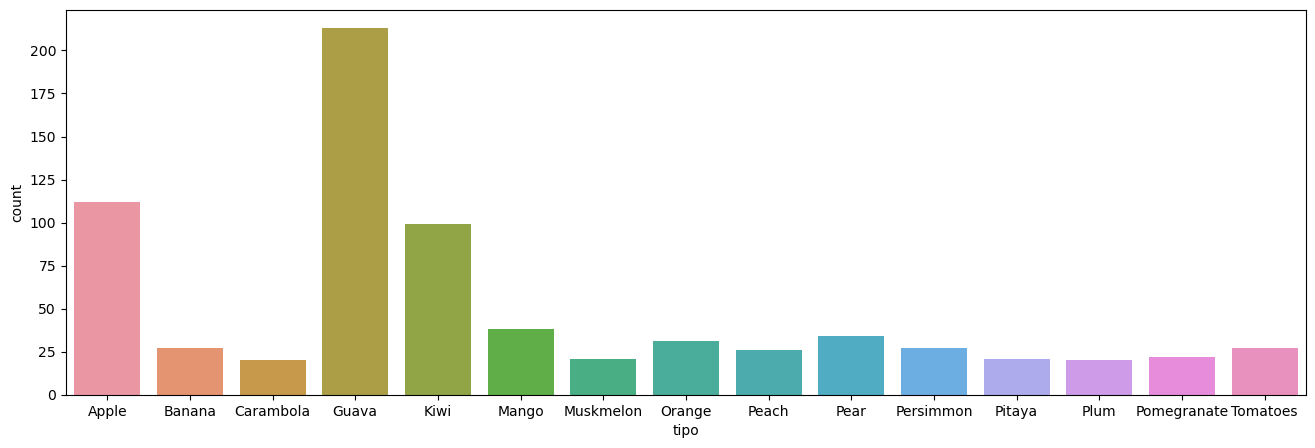

In [126]:
plt.figure(figsize = (16, 5))
sns.countplot(data = tiempo_irregular, x = "tipo")
plt.show()

Parece que tenemos bastantes irregularidades de tiempo en manzanas, seguidos por guava y kiwi.

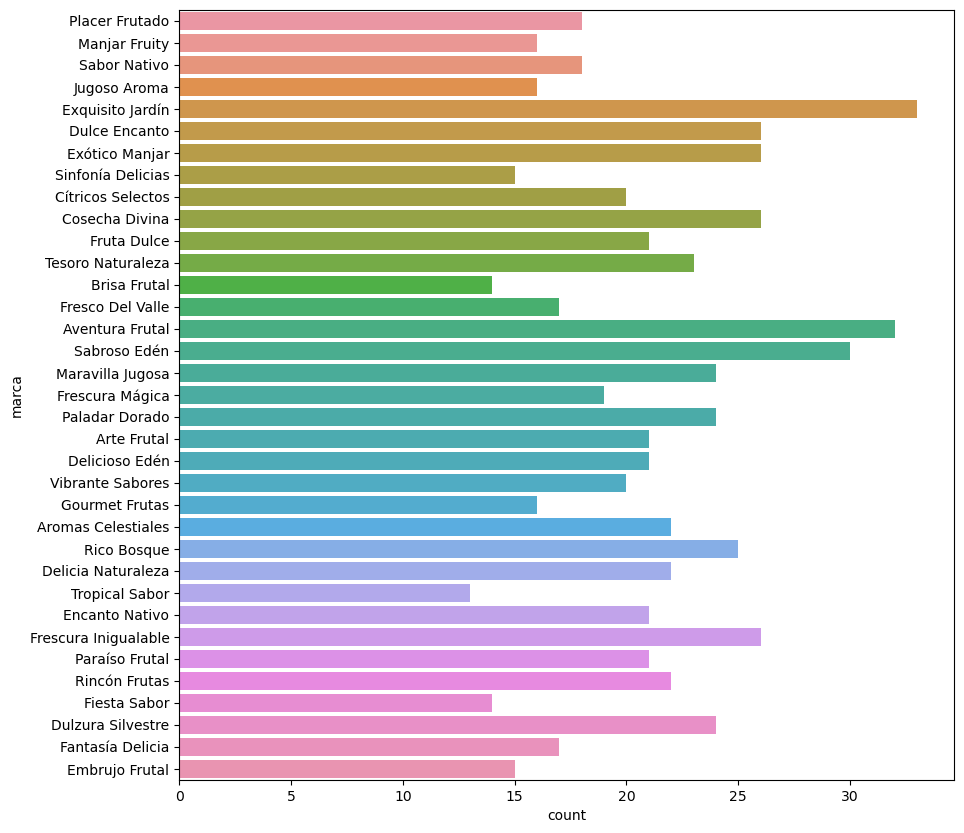

In [127]:
plt.figure(figsize = (10, 10))
sns.countplot(data = tiempo_irregular, y = "marca")
plt.show()

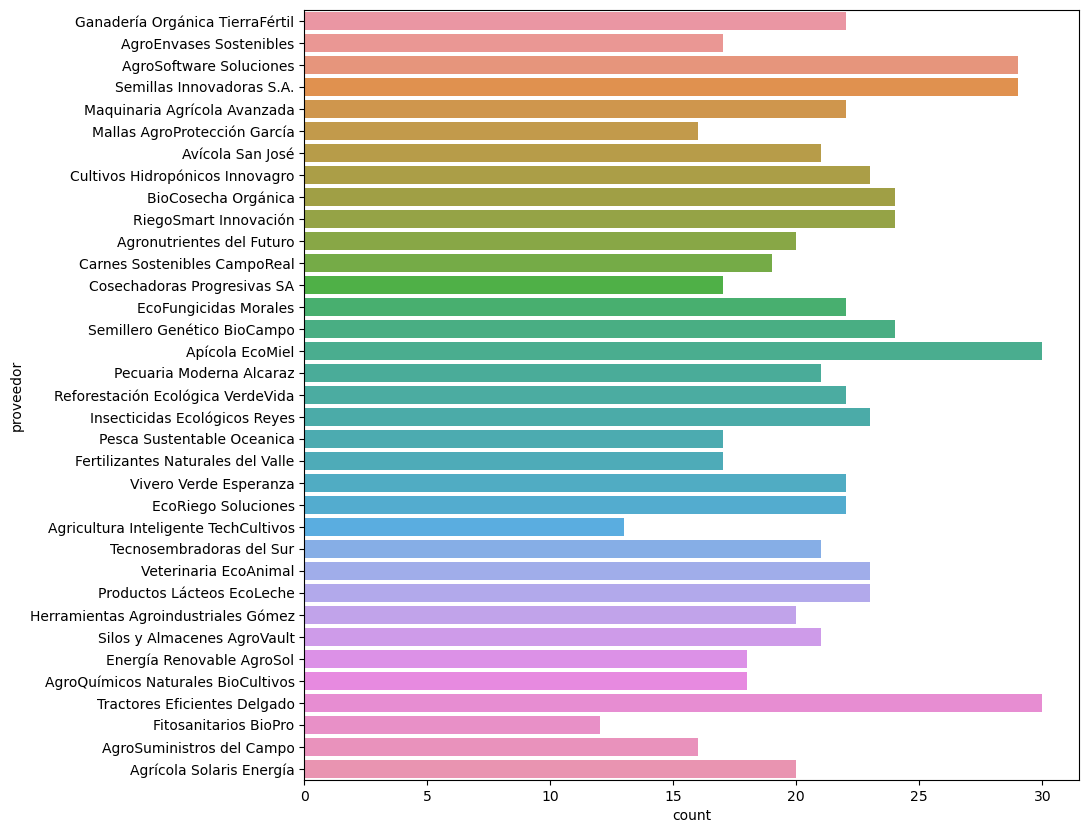

In [128]:
plt.figure(figsize = (10, 10))
sns.countplot(data = tiempo_irregular, y = "proveedor")
plt.show()

Observamos que algunas marcas y proveedores tienen el mayor número de irregularidades que los demás.
Creemos que es un error, ya que esa diferencia no puede ser negativa. Vamos a eliminar estos valores.

In [129]:
df.drop(df[(df["tiempo_camino"] < pd.Timedelta(0, "H"))].index, inplace = True)

## 3.11 Cuestión de lotes 

Del guión:
> Un mismo lote no puede tener marcas o frutas distintas.

In [130]:
lotes = df.groupby("numero_lote").agg(count_marcas = ("marca", "nunique"), count_tipos = ("tipo", "nunique"), 
                                      unique_marcas = ("marca", "unique"), unique_tipos = ("tipo", "unique"),
                                      unique_categorias = ("categoria", "unique")).reset_index()

### 3.11.1 Investigación de marcas

In [131]:
lotes_marca = lotes[lotes["count_marcas"] > 1] 

In [132]:
lotes_marca.sort_values(by = "count_marcas", ascending = False).sample(10)

numero_lote  count_marcas  count_tipos  \
9075  G80V76K69L53M49M46V78M             2            1   
9007   G80V76K69L50P54J80T71             2            1   
9120  G80V76K69L55M51U46V78M             2            1   
8975   G80V76K69L49N53J80T71             2            1   
9057   G80V76K69L52T54J80T71             2            1   
9104  G80V76K69L54M50U46V78M             2            1   
9008   G80V76K69L50P55J80T71             2            1   
9071  G80V76K69L53M48S46V78M             2            1   
9054   G80V76K69L52T51J80T71             2            1   
9068  G80V76K69L53M48P46V78M             2            1   

                               unique_marcas unique_tipos   unique_categorias  
9075        [Fruta Dulce, Sinfonía Delicias]      [Apple]  [Apple D, Apple E]  
9007         [Jugoso Aroma, Frescura Mágica]      [Apple]  [Apple D, Apple E]  
9120          [Arte Frutal, Aventura Frutal]      [Apple]  [Apple D, Apple E]  
8975           [Cosecha Divina, Rico Bosque]      [Apple]  [Apple D, Apple E]  
9057   [Dulce Encanto, Frescura Inigualable]      [Apple]  [Apple D, Apple E]  
9104   [Frescura Mágica, Delicia Naturaleza]      [Apple]  [Apple D, Apple E]  
9008   [Vibrante Sabores, Tesoro Naturaleza]      [Apple]  [Apple D, Apple E]  
9071             [Arte Frutal, Sabroso Edén]      [Apple]  [Apple D, Apple E]  
9054  [Fantasía Delicia, Delicia Naturaleza]      [Apple]  [Apple D, Apple E]  
9068     [Frescura Mágica, Exquisito Jardín]      [Apple]  [Apple D, Apple E]

In [133]:
# porcentaje de numeros de lote que se repiten
round((lotes_marca.shape[0] / df.shape[0]) * 100, 2)

0.16

In [134]:
# investigacione de valores aleatorios
df[df["numero_lote"] == "G80V76K69L53M49M46V78M"]

t_id   tipo     tiempo_recogida categoria  \
2562   applee05111.png  Apple 2022-09-30 20:00:00   Apple D   
2906  Apple E05111.png  Apple 2022-09-02 11:00:00   Apple E   

                 numero_lote              marca     coste_inicial  \
2562  G80V76K69L53M49M46V78M        Fruta Dulce 2.481171298426708   
2906  G80V76K69L53M49M46V78M  Sinfonía Delicias 1.765944337622655   

                          proveedor             cliente        tiempo_venta  \
2562  Insecticidas Ecológicos Reyes  Delicias del Campo 2022-10-01 03:00:00   
2906          EcoFungicidas Morales      Cosecha Fresca 2022-09-02 19:00:00   

          precio_venta                peso fecha_recogida fecha_venta  \
2562 4.558087021032657 294.807000146327766     2022-09-30  2022-10-01   
2906 3.689972932361392 372.586257431233435     2022-09-02  2022-09-02   

      fruta_danada  dia_recogida  dia_venta        diferencia   tiempo_camino  
2562             0            30          1 2.076915722605949 0 days 07:00:00  
2906             0             2          2 1.924028594738736 0 days 08:00:00

In [135]:
df[df["numero_lote"] == "G80V76K69L50P51J80T71"]

t_id   tipo     tiempo_recogida categoria  \
2501   applee0243.png  Apple 2022-09-20 09:00:00   Apple D   
2847  Apple E0243.png  Apple 2022-09-04 02:00:00   Apple E   

                numero_lote           marca     coste_inicial  \
2501  G80V76K69L50P51J80T71  Paraíso Frutal 1.876711819235751   
2847  G80V76K69L50P51J80T71  Embrujo Frutal 2.379057669542881   

                              proveedor                 cliente  \
2501  Reforestación Ecológica VerdeVida             Mega Ahorro   
2847           Agrícola Solaris Energía  Eco Mercado Sostenible   

            tiempo_venta      precio_venta                peso fecha_recogida  \
2501 2022-09-20 18:00:00 3.575292371981165 325.782958203117801     2022-09-20   
2847 2022-09-04 09:00:00 3.753637729803543 296.005163772728338     2022-09-04   

     fecha_venta  fruta_danada  dia_recogida  dia_venta        diferencia  \
2501  2022-09-20             0            20         20 1.698580552745413   
2847  2022-09-04             0             4          4 1.374580060260662   

       tiempo_camino  
2501 0 days 09:00:00  
2847 0 days 07:00:00

In [136]:
df[df["numero_lote"] == "G80V76K69L53M48U46V78M"]

t_id   tipo     tiempo_recogida categoria  \
2560   applee05109.png  Apple 2022-09-27 15:00:00   Apple D   
2904  Apple E05109.png  Apple 2022-09-01 13:00:00   Apple E   

                 numero_lote              marca     coste_inicial  \
2560  G80V76K69L53M48U46V78M       Jugoso Aroma 2.429299006382581   
2904  G80V76K69L53M48U46V78M  Cítricos Selectos 1.929636120109721   

                     proveedor             cliente        tiempo_venta  \
2560  Agrícola Solaris Energía  Super Ofertas Plus 2022-09-27 20:00:00   
2904   AgroSoftware Soluciones  Super Ofertas Plus 2022-09-01 16:00:00   

          precio_venta                peso fecha_recogida fecha_venta  \
2560 3.939050724919009 244.963991387242942     2022-09-27  2022-09-27   
2904 4.236628389100104 299.331773312217365     2022-09-01  2022-09-01   

      fruta_danada  dia_recogida  dia_venta        diferencia   tiempo_camino  
2560             0            27         27 1.509751718536428 0 days 05:00:00  
2904             0             1          1 2.306992268990383 0 days 03:00:00

In [137]:
# convertimos categrias unicas en tupla y las contamos
lotes_marca.loc[:, "unique_categorias"] = lotes_marca["unique_categorias"].apply(tuple)
lotes_marca["unique_categorias"].value_counts()

unique_categorias
(Apple D, Apple E)    111
Name: count, dtype: int64

Después de investigar sobre los números de lote, podemos observar que esos números de lotes coinciden, pero son diferentes imagenes y categorias. También observamos que eso pasa solo a dos categorias de Apple, A y D. *Por lo tanto, para nuestra comodidad vamos a añadir al numero de lote la categoría de la fruta.*
Por ejemplo, al numero_lote de Apple D añadiremos una "D", pero primero inverstigatemos el número de lote.

#### 3.11.1.1 Investigación de numero_lote

In [138]:
print(df.shape[0])
df["numero_lote"].nunique()

68217


68101

Observamos que tenemos 68.101 números de lote únicos. Los que coinciden son de Apple D y E. Vamos a investigar como se categorizan los números de lotes.

In [139]:
df["numero_lote"].apply(len).value_counts()

numero_lote
21    15413
22    12501
24     6156
19     5298
18     3547
36     3275
25     3182
28     3042
27     3018
47     2111
26     2110
35     1772
23     1381
37     1317
16     1233
30     1219
45      890
33      347
15      104
44       89
20       89
31       88
32       17
42        9
13        9
Name: count, dtype: int64

La longitud de los números de lotes varía entre 13 y 47.    
Vamos a ver cual es el carácter último del número de lote.

In [140]:
df["ultimo_car"] = df["numero_lote"].str[-1]
df["ultimo_car"].value_counts()

ultimo_car
1    36181
M    32036
Name: count, dtype: int64

### 3.11.1 Investigación de marcas

In [141]:
# creamos la funcion para anadir la letra de la categoria al lote
def apple_d_e(num_lote, categoria):
    if "Apple D" in categoria or "Apple E" in categoria:
        return num_lote + categoria[-1]
    else:
        return num_lote

In [142]:
# asignamos la letra al numero de lote
df["numero_lote"] = df.apply(lambda row: apple_d_e(row["numero_lote"], row["categoria"]), axis = 1)

In [143]:
df.shape

(68217, 20)

### 3.11.2 Investigación de tipos

In [144]:
lotes_tipo = lotes[lotes["count_tipos"] > 1]
lotes_tipo

Empty DataFrame
Columns: [numero_lote, count_marcas, count_tipos, unique_marcas, unique_tipos, unique_categorias]
Index: []

Observamos que no hay ese error en el caso de tipos de fruta.

# 4. KPI's

In [145]:
df.head(1)

t_id   tipo     tiempo_recogida categoria      numero_lote  \
0  Apple 1.png  Apple 2022-09-19 08:00:00   Apple A  G80V76K49J80T71   

            marca     coste_inicial                             proveedor  \
0  Paraíso Frutal 2.642048011224653  Agricultura Inteligente TechCultivos   

          cliente        tiempo_venta      precio_venta                peso  \
0  Compra Maestra 2022-09-19 12:00:00 4.909680048977395 264.195356627132924   

  fecha_recogida fecha_venta  fruta_danada  dia_recogida  dia_venta  \
0     2022-09-19  2022-09-19             0            19         19   

         diferencia   tiempo_camino ultimo_car  
0 2.267632037752742 0 days 04:00:00          1

In [146]:
pd.set_option("display.float_format", "{:.2f}".format)

In [147]:
# cogemos solo valores de septiembre, ya que la empresa pide investigar los datos de este mes
df['fecha_recogida'] = pd.to_datetime(df['fecha_recogida'])
df['fecha_venta'] = pd.to_datetime(df['fecha_venta'])
start_date = pd.to_datetime('2022-09-01')
end_date = pd.to_datetime('2022-09-30')

df_sep = df[(df['fecha_recogida'] >= start_date) & (df['fecha_venta'] <= end_date)]

In [148]:
df["tipo"].value_counts()

tipo
Guava          18935
Apple          10110
Kiwi            8346
Mango           4109
Banana          2993
Orange          2975
Pear            2970
Peach           2597
Pitaya          2475
Plum            2276
Tomatoes        2141
Pomegranate     2140
Carambola       2054
Muskmelon       2053
Persimmon       2043
Name: count, dtype: int64

## 4.1 KPI's del guion

**1. Calcular la cuantía total de las distribuciones**

In [149]:
cuant_dist = df_sep["t_id"].count()
print(f"La cuantía total de las distribuciones es {cuant_dist}")

La cuantía total de las distribuciones es 66645


**2. Calcular la media diaria de la cuantía de las distribuciones**

In [150]:
dist_dia_media = round(df_sep.groupby("fecha_venta")["t_id"].count().mean())
print(f"La media diaria de la cuantía de las distribuciones es {dist_dia_media}")

La media diaria de la cuantía de las distribuciones es 2222


**3. ¿Qué días del mes se han producido más distribuciones y cuántas?**

In [151]:
dist_cada_dia = df_sep.groupby("fecha_venta").agg(numero_distribuciones = ("t_id", "count")).sort_values(
                                                        by = "numero_distribuciones", ascending = False).reset_index()
print("Top 10 días con más distribuciones")
dist_cada_dia.head(10)

Top 10 días con más distribuciones


fecha_venta  numero_distribuciones
0  2022-09-13                   2327
1  2022-09-18                   2319
2  2022-09-14                   2313
3  2022-09-03                   2306
4  2022-09-24                   2305
5  2022-09-22                   2305
6  2022-09-16                   2294
7  2022-09-12                   2292
8  2022-09-10                   2289
9  2022-09-19                   2288

In [152]:
fig = px.scatter(dist_cada_dia, y = "numero_distribuciones", x = "fecha_venta", 
                title = "Media de distibuciones", color_discrete_sequence = colors)
fig.update_layout(title_x = 0.5, width = 800, height = 300)

**4. ¿A qué horas del día se producen más recogidas de alimentos y cuántas?**

In [153]:
df_sep = df_sep.copy()
df_sep["hora_recogida"] = df_sep["tiempo_recogida"].dt.hour
recogida_hora = df_sep.groupby("hora_recogida").agg(numero_recogidas = ("t_id", "count")).sort_values(
                                                        by = "numero_recogidas", ascending = False).reset_index()
print("Top 10 horas cuando se producen más recogidas")
recogida_hora.head(10)

Top 10 horas cuando se producen más recogidas


hora_recogida  numero_recogidas
0             13              2889
1             10              2881
2              3              2862
3             11              2858
4              9              2830
5             18              2824
6             17              2820
7             19              2815
8              6              2805
9             14              2803

In [154]:
fig = px.scatter(recogida_hora, x = "hora_recogida", y = "numero_recogidas", color_discrete_sequence = colors)
fig

**5. ¿Cuáles son los 5 clientes que más dinero han gastado comprando la fruta y cuánto?**

In [155]:
clientes_gasto = df_sep.groupby("cliente").agg(dinero_gastado = ("precio_venta", "sum")).sort_values(
                                                by = "dinero_gastado", ascending = False).reset_index()
clientes_gasto["dinero_gastado"] = clientes_gasto["dinero_gastado"].astype(int)
print("5 clientes que más dinero han gastado")
clientes_gasto.head(5)

5 clientes que más dinero han gastado


cliente  dinero_gastado
0      Super Económico            7169
1      Maxi Descuentos            7049
2  Super Mercado Ideal            7033
3       Cosecha Fresca            7010
4       Tienda Selecta            6985

**6. ¿Cuáles son los 5 clientes que menos dinero han gastado comprando la fruta y cuánto?**

In [156]:
print("5 clientes que menos dinero han gastado")
clientes_gasto.tail()

5 clientes que menos dinero han gastado


cliente  dinero_gastado
29      Distribuidora Nacional            6704
30        Super Ahorro Express            6680
31  Central de Abastos Central            6650
32       Distribuidora Gourmet            6587
33            Almacén Estrella            6551

In [157]:
fig_gasto = px.bar(clientes_gasto, x = "dinero_gastado", y = "cliente", color_discrete_sequence = colors)
fig_gasto.update_layout(plot_bgcolor = "rgba(255, 255, 255, 0.1)", paper_bgcolor = "rgba(255, 255, 255, 0.95)", 
                       title_text = "Gastos de Clientes", title_x = 0.5, height = 800, width = 1000)
fig_gasto.update_xaxes(title_text = "Dinero Gastado")
fig_gasto.update_yaxes(title_text = "Cliente")
fig_gasto

**7. ¿Cuáles son los 10 proveedores que han recibido más dinero y cuánto?**

In [158]:
prov_ganado = df_sep.groupby("proveedor").agg(dinero_recibido = ("coste_inicial", "sum")).sort_values(
                                                            by = "dinero_recibido" , ascending = False).reset_index()
prov_ganado["dinero_recibido"] = prov_ganado["dinero_recibido"].astype(int)
print("10 proveedores que más dinero han recibido")
prov_ganado.head(10)

10 proveedores que más dinero han recibido


proveedor  dinero_recibido
0                 EcoFungicidas Morales             3925
1             Agronutrientes del Futuro             3916
2         Insecticidas Ecológicos Reyes             3906
3               AgroEnvases Sostenibles             3886
4  Agricultura Inteligente TechCultivos             3883
5                 RiegoSmart Innovación             3881
6          Maquinaria Agrícola Avanzada             3873
7          Tractores Eficientes Delgado             3858
8            Productos Lácteos EcoLeche             3855
9       Cultivos Hidropónicos Innovagro             3855

In [159]:
fig_ganado = px.bar(prov_ganado, x = "dinero_recibido", y = "proveedor", color_discrete_sequence = colors)
fig_ganado.update_layout(plot_bgcolor = "rgba(255, 255, 255, 0.1)", paper_bgcolor = "rgba(255, 255, 255, 0.95)", 
                       title_text = "Ganancias de Proveedores", title_x = 0.5, height = 800, width = 1000)
fig_ganado.update_xaxes(title_text = "Dinero Ganado")
fig_ganado.update_yaxes(title_text = "Proveedor")
fig_ganado

**8. ¿Cuáles son los 3 productos con mayor beneficio a lo largo del mes (aquellos que al restarle   
al coste de venta el precio de compra se quedan con un mejor resultado) y cuál ha sido su balance?**

In [160]:
prod_beneficio = df_sep.groupby("tipo").agg(beneficio = ("precio_venta", "sum"), inicial = ("coste_inicial", "sum")).sort_values(
                                        by = "beneficio", ascending = False).reset_index()
prod_beneficio["beneficio"] = (prod_beneficio["beneficio"] - prod_beneficio["inicial"]).astype(int)
prod_beneficio.drop("inicial", axis = 1, inplace = True)
print("Los 3 productos con mayor beneficio")
prod_beneficio.head(3)

Los 3 productos con mayor beneficio


tipo  beneficio
0  Guava      27684
1  Apple      14700
2   Kiwi      12307

**9. ¿Cuáles son los 3 productos con peor beneficio a lo largo de todo el mes y cuál ha sido?**

In [161]:
print("Los 3 productos con peor beneficio")
prod_beneficio.tail(3)

Los 3 productos con peor beneficio


tipo  beneficio
12  Muskmelon       3012
13  Persimmon       3033
14  Carambola       2998

In [162]:
fig_beneficio = px.bar(prod_beneficio, x = "tipo", y = "beneficio", color_discrete_sequence = colors)
fig_beneficio.update_layout(plot_bgcolor = "rgba(255, 255, 255, 0.1)", paper_bgcolor = "rgba(255, 255, 255, 0.95)", 
                       title_text = "Beneficio por Fruta", title_x = 0.5, height = 600, width = 1000)
fig_beneficio.update_xaxes(title_text = "Tipo de Fruta")
fig_beneficio.update_yaxes(title_text = "Beneficio")
fig_beneficio

**10. ¿Cuál es el precio de venta medio de cada fruta?**

In [163]:
print("El precio de venta medio de cada fruta")
precio_medio = df_sep.groupby("tipo").agg({"precio_venta" : "mean"}).sort_values(by = "precio_venta", ascending = False).reset_index()
precio_medio

El precio de venta medio de cada fruta


tipo  precio_venta
0          Pear          3.52
1         Peach          3.52
2        Pitaya          3.52
3        Orange          3.52
4   Pomegranate          3.51
5          Kiwi          3.51
6     Persimmon          3.50
7         Guava          3.50
8         Mango          3.50
9        Banana          3.49
10    Muskmelon          3.49
11        Apple          3.49
12         Plum          3.48
13    Carambola          3.48
14     Tomatoes          3.45

In [164]:
fig_precio_medio = px.bar(precio_medio, x = "tipo", y = "precio_venta", color_discrete_sequence = colors)
fig_precio_medio.update_layout(plot_bgcolor = "rgba(255, 255, 255, 0.1)", paper_bgcolor = "rgba(255, 255, 255, 0.95)", 
                       title_text = "Precio Medio de Venta de Fruta", title_x = 0.5, height = 600, width = 1000)
fig_precio_medio.update_xaxes(title_text = "Tipo de Fruta")
fig_precio_medio.update_yaxes(title_text = "Precio Medio")
fig_precio_medio

**11. Suponiendo que si no se dispone de información de venta se trata de una fruta  que no ha podido venderse   
por haber sido dañada durante la distribución, ¿cuánta fruta de cada tipo ha sido dañada?**

In [165]:
print("Cantidad de fruta dañada de cada tipo")
daniada = df_sep.groupby("tipo").agg({"fruta_danada" : "sum"}).sort_values(by = "fruta_danada", ascending = False).reset_index()
daniada

Cantidad de fruta dañada de cada tipo


tipo  fruta_danada
0         Apple             0
1        Banana             0
2     Carambola             0
3         Guava             0
4          Kiwi             0
5         Mango             0
6     Muskmelon             0
7        Orange             0
8         Peach             0
9          Pear             0
10    Persimmon             0
11       Pitaya             0
12         Plum             0
13  Pomegranate             0
14     Tomatoes             0

**12. ¿Cuál ha sido la pérdida total de la fruta dañada?**

In [166]:
perdida = round(df_sep.loc[df["fruta_danada"] == 1, "coste_inicial"].sum(), 2)
print(f"La pérdida total de la fruta dañada ha sido {perdida}")

La pérdida total de la fruta dañada ha sido 0.0


**13. ¿Cuál es la cuantía total de cada tipo de fruta que han comprado los 5 clientes que más dinero han gastado?**

In [167]:
clientes_5 = df.groupby(["cliente", "tipo"]).agg(cuantia_total = ("t_id", "count")).reset_index()
lista_clientes_5 = clientes_gasto["cliente"].head(5).tolist()
clientes_5 = clientes_5[clientes_5["cliente"].isin(lista_clientes_5)]

In [168]:
fig_clientes_5 = px.bar(clientes_5, x = "cuantia_total", y = "cliente", color = "tipo", color_continuous_scale = colors,
                        color_discrete_sequence = colors)
fig_clientes_5.update_layout(plot_bgcolor = "rgba(255, 255, 255, 0.1)", paper_bgcolor = "rgba(255, 255, 255, 0.95)", 
                       title_text = "Cuantía Total de Fruta Comprada por Top-5 Clientes", title_x = 0.5, legend_title_text = "Tipo de Fruta",
                       height = 300, width = 1000)
fig_clientes_5.update_xaxes(title_text = "Gastos")
fig_clientes_5.update_yaxes(title_text = "Cliente")
fig_clientes_5

**14. Para cada producto, calcular el porcentaje de beneficio.**  
porcentaje de beneficio = ((precio_venta - coste_inicial) / coste_inicial) * 100

In [169]:
beneficio_fruta = df_sep.groupby("tipo").agg({"coste_inicial": "sum", "precio_venta" : "sum"})
beneficio_fruta["porcentaje_beneficio"] = round(((beneficio_fruta["precio_venta"] - beneficio_fruta["coste_inicial"]) 
                                           /  beneficio_fruta["coste_inicial"]) * 100, 2)
beneficio_fruta.drop(columns = ["coste_inicial", "precio_venta"], axis = 1, inplace = True)
print("Porcentaje de beneficio de cada tipo de fruta")
beneficio_fruta = beneficio_fruta.sort_values(by = "porcentaje_beneficio", ascending = False).reset_index()
beneficio_fruta

Porcentaje de beneficio de cada tipo de fruta


tipo  porcentaje_beneficio
0   Pomegranate                 76.70
1        Pitaya                 76.25
2     Persimmon                 76.12
3          Pear                 76.01
4        Orange                 75.56
5        Banana                 75.46
6         Peach                 75.25
7     Muskmelon                 75.17
8          Kiwi                 75.16
9     Carambola                 74.93
10        Guava                 74.81
11        Apple                 74.66
12        Mango                 74.19
13         Plum                 73.37
14     Tomatoes                 73.23

In [170]:
fig_prcnt_benef = px.bar(beneficio_fruta, x = "tipo", y = "porcentaje_beneficio", color_discrete_sequence = colors)
fig_prcnt_benef.update_layout(plot_bgcolor = "rgba(255, 255, 255, 0.1)", paper_bgcolor = "rgba(255, 255, 255, 0.95)", 
                       title_text = "% de Beneficio por Fruta", title_x = 0.5, height = 600, width = 1000)
fig_prcnt_benef.update_xaxes(title_text = "Tipo de Fruta")
fig_prcnt_benef.update_yaxes(title_text = "% de Beneficio")
fig_prcnt_benef

## 4.2 Nuestros KPIs

**1. ¿Hay clientes que hacen varias compras al día?   
¿Cuántos son y cuántas compran hacen? ¿En qué fechas?**

In [171]:
# Agrupamos por cliente y fecha de venta, para saber cuantas compras hacen al dia cada cliente
compras_diarias = df_sep.groupby(['cliente', 'fecha_venta']).size().reset_index(name='compras_por_dia')

# Creamos la grafica donde usaremos en el eje X los dias, en el eje Y la candidad total de veces que se compro fruta y los
# colores represetan cada uno de los clientes que compro

fig_cliente_compra_dia = px.bar(compras_diarias, x='fecha_venta',  y ='compras_por_dia', color='cliente', color_continuous_scale = colors,
                        color_discrete_sequence = colors)

fig_cliente_compra_dia.update_layout(plot_bgcolor = "rgba(255, 255, 255, 0.1)", paper_bgcolor = "rgba(255, 255, 255, 0.95)",
                       title_text = "Compras de cada cliente al dia", title_x = 0.5, legend_title_text = "Cliente",
                       height = 1000, width = 1300)

fig_cliente_compra_dia.update_xaxes(title_text = "Fecha")
fig_cliente_compra_dia.update_yaxes(title_text = "Compras al dia")

fig_cliente_compra_dia

Con esta gráfica, demostramos que en cada uno de los dias de septiembre, cada cliente compró varias veces al dia, algun tipo de fruta de algun proveedor.
Respondiendo a las preguntas: Si, todos los clientes hacen varias comprar por dia durante todo el mes.

**2. Beneficio de cada fruta (dinero).**

In [172]:
#Agrupamos por fecha de venta y tipo de fruta y sumamos el precio de venta. De esta forma obtenemos el beneficio de cada fruta en cada dia.
beneficio_fruta = df_sep.groupby(['tipo', 'fecha_venta'])['precio_venta'].sum().reset_index(name='beneficio_fruta_dia')

#Hacemos un grafico para conseguir visualizar mas facil estos resultado
fig_beneficio_fruta_dia = px.bar(beneficio_fruta, x='fecha_venta', y='beneficio_fruta_dia', color='tipo', color_continuous_scale = colors,
                        color_discrete_sequence = colors)

fig_beneficio_fruta_dia.update_layout(plot_bgcolor = "rgba(255, 255, 255, 0.1)", paper_bgcolor = "rgba(255, 255, 255, 0.95)",
                       title_text = "Beneficio de cada fruta al dia", title_x = 0.5, legend_title_text = "tipo",
                       height = 1000, width = 1300)

fig_beneficio_fruta_dia.update_xaxes(title_text = "fecha_venta")
fig_beneficio_fruta_dia.update_yaxes(title_text = "beneficio_fruta_dia")

fig_beneficio_fruta_dia

In [173]:
beneficio_fruta_precio_ord = beneficio_fruta.sort_values(by='beneficio_fruta_dia', ascending=True)
beneficio_fruta_precio_ord

tipo fecha_venta  beneficio_fruta_dia
180    Muskmelon  2022-09-01                72.79
420     Tomatoes  2022-09-01                86.93
390  Pomegranate  2022-09-01                87.84
330       Pitaya  2022-09-01                97.06
210       Orange  2022-09-01                97.83
..           ...         ...                  ...
103        Guava  2022-09-14              2290.12
102        Guava  2022-09-13              2291.31
104        Guava  2022-09-15              2298.08
113        Guava  2022-09-24              2298.46
101        Guava  2022-09-12              2305.85

[450 rows x 3 columns]

In [174]:
#Añadimos al Dataframa la diferencia entre precio inicial y precio de venta (beneficio)
df_beneficio = df_sep
df_beneficio['beneficio'] = df_beneficio['precio_venta'] - df_beneficio['coste_inicial']
#Agrupamos por tipo de fruta y sumamos los beneficios. De esta forma obtenemos el beneficio de cada fruta en el mes.
beneficio_fruta_mes = df_beneficio.groupby(['tipo'])['beneficio'].sum().reset_index(name='beneficio_fruta_total')
beneficio_fruta_mes

tipo  beneficio_fruta_total
0         Apple               14700.66
1        Banana                4378.99
2     Carambola                2998.47
3         Guava               27684.09
4          Kiwi               12307.09
5         Mango                5972.19
6     Muskmelon                3012.91
7        Orange                4421.89
8         Peach                3836.70
9          Pear                4418.13
10    Persimmon                3033.66
11       Pitaya                3682.80
12         Plum                3262.92
13  Pomegranate                3182.89
14     Tomatoes                3056.49

In [175]:
#Hacemos un grafico para conseguir visualizar mas facil estos resultado
fig_beneficio_fruta_mes = px.bar(beneficio_fruta_mes, x='tipo', y='beneficio_fruta_total', color_continuous_scale = colors,
                        color_discrete_sequence = colors)

fig_beneficio_fruta_mes.update_layout(plot_bgcolor = "rgba(255, 255, 255, 0.1)", paper_bgcolor = "rgba(255, 255, 255, 0.95)",
                       title_text = "Beneficio de cada fruta al mes", title_x = 0.5,
                       height = 500, width = 700)

fig_beneficio_fruta_mes.update_xaxes(title_text = "tipo")
fig_beneficio_fruta_mes.update_yaxes(title_text = "beneficio_fruta_mes")

fig_beneficio_fruta_mes

**3. Tiempo promedio desde la recogida hasta la venta, en general, de cada fruta, de proveedores.**

In [176]:
tiempo_recogida_fruta = df_sep
#Creamos una nueva columna para saber el tiempo que pasa desde la recogida hasta la venta de la fruta
tiempo_recogida_fruta['tiempo_venta_recogida'] = tiempo_recogida_fruta['tiempo_venta'] - tiempo_recogida_fruta['tiempo_recogida']
#Hayamos la media del tiempo de recogida por cada tipo de gruta
promedio_tiempo_recogida_fruta = tiempo_recogida_fruta.groupby(['tipo'])['tiempo_venta_recogida'].mean().reset_index(name='Tiempo_promedio_recogida_fruta')
promedio_tiempo_recogida_fruta

tipo Tiempo_promedio_recogida_fruta
0         Apple      0 days 06:30:03.286004056
1        Banana      0 days 06:36:15.566231983
2     Carambola      0 days 06:27:39.472899055
3         Guava      0 days 06:32:37.118891714
4          Kiwi      0 days 06:33:21.517190750
5         Mango      0 days 06:28:22.569219256
6     Muskmelon      0 days 06:32:51.769383697
7        Orange      0 days 06:31:19.493324204
8         Peach      0 days 06:35:59.432847577
9          Pear      0 days 06:30:36.532507739
10    Persimmon      0 days 06:31:35.209580838
11       Pitaya      0 days 06:32:36.198347107
12         Plum      0 days 06:28:28.088567555
13  Pomegranate      0 days 06:33:48.338918142
14     Tomatoes      0 days 06:31:08.767908309

In [177]:
cant_ventas_fruta = df_sep.groupby('fecha_venta')['tipo'].count().reset_index(name='cantidad_frutas_dia')

cant_ventas_fruta

fecha_venta  cantidad_frutas_dia
0   2022-09-01                  862
1   2022-09-02                 2275
2   2022-09-03                 2306
3   2022-09-04                 2265
4   2022-09-05                 2232
5   2022-09-06                 2170
6   2022-09-07                 2225
7   2022-09-08                 2257
8   2022-09-09                 2275
9   2022-09-10                 2289
10  2022-09-11                 2286
11  2022-09-12                 2292
12  2022-09-13                 2327
13  2022-09-14                 2313
14  2022-09-15                 2280
15  2022-09-16                 2294
16  2022-09-17                 2210
17  2022-09-18                 2319
18  2022-09-19                 2288
19  2022-09-20                 2230
20  2022-09-21                 2245
21  2022-09-22                 2305
22  2022-09-23                 2266
23  2022-09-24                 2305
24  2022-09-25                 2277
25  2022-09-26                 2174
26  2022-09-27                 2275
27  2022-09-28                 2231
28  2022-09-29                 2286
29  2022-09-30                 2286

In [178]:
cant_ventas_fruta = df.groupby('fecha_venta')['peso'].sum().reset_index(name='peso_frutas_dia')

cant_ventas_fruta

fecha_venta  peso_frutas_dia
0   2022-09-01        259987.68
1   2022-09-02        681956.73
2   2022-09-03        694008.30
3   2022-09-04        675359.36
4   2022-09-05        670935.60
5   2022-09-06        654242.06
6   2022-09-07        675060.92
7   2022-09-08        670748.85
8   2022-09-09        680484.60
9   2022-09-10        689420.12
10  2022-09-11        693970.60
11  2022-09-12        689175.72
12  2022-09-13        707236.47
13  2022-09-14        694637.23
14  2022-09-15        680185.53
15  2022-09-16        695241.26
16  2022-09-17        659227.02
17  2022-09-18        705074.15
18  2022-09-19        678989.15
19  2022-09-20        671211.00
20  2022-09-21        669814.19
21  2022-09-22        695333.66
22  2022-09-23        681372.16
23  2022-09-24        693033.52
24  2022-09-25        691535.19
25  2022-09-26        656001.44
26  2022-09-27        685869.84
27  2022-09-28        676021.89
28  2022-09-29        691261.07
29  2022-09-30        687570.86
30  2022-10-01        400553.43

In [179]:
df.head()

t_id   tipo     tiempo_recogida categoria         numero_lote  \
0    Apple 1.png  Apple 2022-09-19 08:00:00   Apple A     G80V76K49J80T71   
1   Apple 10.png  Apple 2022-09-11 19:00:00   Apple A    G80V76K49L46V78M   
2  Apple 100.png  Apple 2022-09-19 17:00:00   Apple A  G80V76K49L48J80T71   
3  Apple 101.png  Apple 2022-09-28 06:00:00   Apple A  G80V76K49L49J80T71   
4  Apple 102.png  Apple 2022-09-18 17:00:00   Apple A  G80V76K49L50J80T71   

                marca  coste_inicial                             proveedor  \
0      Paraíso Frutal           2.64  Agricultura Inteligente TechCultivos   
1      Tropical Sabor           1.70           Semillero Genético BioCampo   
2  Delicia Naturaleza           1.18            Pesca Sustentable Oceanica   
3      Embrujo Frutal           2.31          Carnes Sostenibles CampoReal   
4      Exótico Manjar           2.47           Silos y Almacenes AgroVault   

                   cliente        tiempo_venta  precio_venta   peso  \
0           Compra Maestra 2022-09-19 12:00:00          4.91 264.20   
1           Compra Maestra 2022-09-12 02:00:00          3.43 141.65   
2          La Tienda Justa 2022-09-19 22:00:00          3.18 151.92   
3  Supermercados del Valle 2022-09-28 17:00:00          4.13 442.48   
4          Tienda Familiar 2022-09-19 03:00:00          3.35 423.78   

  fecha_recogida fecha_venta  fruta_danada  dia_recogida  dia_venta  \
0     2022-09-19  2022-09-19             0            19         19   
1     2022-09-11  2022-09-12             0            11         12   
2     2022-09-19  2022-09-19             0            19         19   
3     2022-09-28  2022-09-28             0            28         28   
4     2022-09-18  2022-09-19             0            18         19   

   diferencia   tiempo_camino ultimo_car  
0        2.27 0 days 04:00:00          1  
1        1.72 0 days 07:00:00          M  
2        2.00 0 days 05:00:00          1  
3        1.81 0 days 11:00:00          1  
4        0.88 0 days 10:00:00          1

**4. Cantidades de venta de cada fruta cada día.**

In [180]:
tipo = df_sep.groupby("tipo").agg(count = ("tipo", "count")).reset_index()
fig_tipo = px.bar(tipo, x = "tipo", y = "count", color_discrete_sequence = colors)
fig_tipo.update_layout(showlegend = False, plot_bgcolor = "rgba(255, 255, 255, 0.1)", paper_bgcolor = "rgba(255, 255, 255, 0.95)", 
                       title_text = "Cantidad de Fruta Distribuida", title_x = 0.5,
                       height = 400, width = 1000)
fig_tipo.update_xaxes(title_text = "Tipo de Fruta")
fig_tipo.update_yaxes(title_text = "Cantidad")
fig_tipo

**5. ¿Hay dias especificos de la semana cuando las ventas son mas altas?**

In [181]:
#Agrupamos por fecha de venta y tipo de fruta y sumamos el precio de venta. De esta forma obtenemos el beneficio de cada fruta en cada dia.
beneficio_dia = df_sep.groupby('fecha_venta')['precio_venta'].sum().reset_index(name='beneficio_dia')

#Hacemos un grafico para conseguir visualizar mas facil estos resultado
fig_beneficio_dia = px.bar(beneficio_dia, x='fecha_venta', y='beneficio_dia', color_continuous_scale = colors,
                        color_discrete_sequence = colors)

fig_beneficio_dia.update_layout(plot_bgcolor = "rgba(255, 255, 255, 0.1)", paper_bgcolor = "rgba(255, 255, 255, 0.95)",
                       title_text = "Beneficios al dia", title_x = 0.5,
                       height = 600, width = 800)

fig_beneficio_dia.update_xaxes(title_text = "fecha_venta")
fig_beneficio_dia.update_yaxes(title_text = "beneficio_dia")

fig_beneficio_dia

En esta grafica podemos concluir que la tercera semana de septiembre   
(del lunes 12 al domngo 18) fue la semana que mas se consumió

**6. Investigar las horas de venta.**

In [182]:
df_sep.sample(5)

t_id       tipo     tiempo_recogida    categoria  \
51667      Orange00483.png     Orange 2022-09-25 03:00:00       Orange   
52335      Peach001084.png      Peach 2022-09-09 17:00:00        Peach   
14708  Carambola 00425.png  Carambola 2022-09-29 18:00:00    Carambola   
26986     GuavaÒÇé2428.png      Guava 2022-09-25 19:00:00  Guava total   
48682  Muskmelon 00507.png  Muskmelon 2022-09-05 22:00:00    muskmelon   

                       numero_lote               marca  coste_inicial  \
51667       U82G78M69L48P56O46V78M  Aromas Celestiales           2.14   
52335       V69G67N48L49L56P46V78M      Cosecha Divina           1.87   
14708  I65B65S66U76G48L52N53J80T71      Delicioso Edén           2.02   
26986   M85G86G210I201N52N56J80T71        Brisa Frutal           2.00   
48682  S85C75S69R79T48L53L55J80T71  Delicia Naturaleza           2.12   

                                 proveedor                 cliente  \
51667  Herramientas Agroindustriales Gómez        Almacén Estrella   
52335        Insecticidas Ecológicos Reyes        Almacén Estrella   
14708              AgroSoftware Soluciones             Mega Ahorro   
26986         Mallas AgroProtección García  Eco Mercado Sostenible   
48682                EcoFungicidas Morales             Mega Compra   

             tiempo_venta  ...  fecha_venta  fruta_danada dia_recogida  \
51667 2022-09-25 07:00:00  ...   2022-09-25             0           25   
52335 2022-09-10 02:00:00  ...   2022-09-10             0            9   
14708 2022-09-30 00:00:00  ...   2022-09-30             0           29   
26986 2022-09-26 06:00:00  ...   2022-09-26             0           25   
48682 2022-09-06 08:00:00  ...   2022-09-06             0            5   

      dia_venta  diferencia   tiempo_camino  ultimo_car  hora_recogida  \
51667        25        1.70 0 days 04:00:00           M              3   
52335        10        1.16 0 days 09:00:00           M             17   
14708        30        1.93 0 days 06:00:00           1             18   
26986        26        1.43 0 days 11:00:00           1             19   
48682         6        2.55 0 days 10:00:00           1             22   

      beneficio tiempo_venta_recogida  
51667      1.70       0 days 04:00:00  
52335      1.16       0 days 09:00:00  
14708      1.93       0 days 06:00:00  
26986      1.43       0 days 11:00:00  
48682      2.55       0 days 10:00:00  

[5 rows x 23 columns]

In [183]:
hora_recogida = df_sep.groupby('hora_recogida')['tipo'].count().reset_index(name='cantidad_fruta')

hora_recogida

hora_recogida  cantidad_fruta
0               0            2732
1               1            2718
2               2            2753
3               3            2862
4               4            2687
5               5            2727
6               6            2805
7               7            2733
8               8            2798
9               9            2830
10             10            2881
11             11            2858
12             12            2742
13             13            2889
14             14            2803
15             15            2759
16             16            2758
17             17            2820
18             18            2824
19             19            2815
20             20            2627
21             21            2785
22             22            2711
23             23            2728

# 7. CSV's

In [184]:
# creamos dataframes de fruta, marcas, proveedores y clientes para utilizar en SQL
frutas = {fruta: i + 1 for i, fruta in enumerate(df_sep.tipo.unique())}
marcas = {marca: i + 1 for i, marca in enumerate(df_sep.marca.unique())}
proveedores = {proveedor: i + 1 for i, proveedor in enumerate(df_sep.proveedor.unique())}
clientes = {cliente: i + 1 for i, cliente in enumerate(df_sep.cliente.unique())}

In [185]:
# dropeamos las columnas que no vamos a necesitar en SQL
df_sql = df_sep.drop(columns = ["categoria", "fruta_danada", "fecha_recogida", "fecha_venta", "diferencia", 
                               "dia_recogida", "dia_venta", "tiempo_camino", "hora_recogida", "ultimo_car",
                               "beneficio", "tiempo_venta_recogida"], axis = 1)

In [186]:
# asignamos valores numericos a df_sql correspondiente
df_sql["tipo"] = df_sql["tipo"].map(frutas)
df_sql["marca"] = df_sql["marca"].map(marcas)
df_sql["proveedor"] = df_sql["proveedor"].map(proveedores)
df_sql["cliente"] = df_sql["cliente"].map(clientes)

In [187]:
# creamos dataframes de diccionarios para guardar csv's
frutas_df = pd.DataFrame(list(frutas.items()), columns = ["fruta", "id"])
marcas_df = pd.DataFrame(list(marcas.items()), columns = ["marca", "id"])
proveedores_df = pd.DataFrame(list(proveedores.items()), columns = ["proveedor", "id"])
clientes_df = pd.DataFrame(list(clientes.items()), columns=["cliente", "id"])

In [188]:
def replace_tildes(word):
    tildes = {"á": "a", "í": "i", "ú": "u", "ó": "o", "é": "e", "ñ": "n"}
    result = ""
    
    if pd.notna(word):
        for letra in word:
            if letra in tildes:
                result += tildes[letra]
            else:
                result += letra
        return result
    else:
        return word

In [189]:
# quitamos tildes en vocales (no se refleja en sql)
marcas_df["marca"] = marcas_df["marca"].apply(replace_tildes)
proveedores_df["proveedor"] = proveedores_df["proveedor"].apply(replace_tildes)
clientes_df["cliente"] = clientes_df["cliente"].apply(replace_tildes)

In [190]:
# asignamos un id
df_sql["id"] = range(1, len(df_sql) + 1)

In [191]:
# guardamos csv's
df_sql.to_csv("csv/ventas.csv", na_rep = "NULL", index = False)
frutas_df.to_csv("csv/frutas.csv", index = False)
marcas_df.to_csv("csv/marcas.csv", index = False)
proveedores_df.to_csv("csv/proveedores.csv", index = False)
clientes_df.to_csv("csv/clientes.csv", index = False)